In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES
/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv


In [3]:
dataframe = pd.read_csv('/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv')

/tmp/ipykernel_32/1641558378.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv')


In [4]:
dataframe.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [5]:
dataframe.shape

(7461195, 13)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [7]:
dataframe.isna().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [8]:
(dataframe.isna().sum()/dataframe.shape[0])*100

Year of event                 0.000000
Event dates                   0.000000
Event name                    0.000000
Event distance/length         0.014113
Event number of finishers     0.000000
Athlete performance           0.000027
Athlete club                 37.882993
Athlete country               0.000040
Athlete year of birth         7.882933
Athlete gender                0.000094
Athlete age category          7.839736
Athlete average speed         0.003002
Athlete ID                    0.000000
dtype: float64

### Athlete club has 37% missing values thoughout the dataset, Athlete yr of birth has 7.84% missing, Athlete age category has 7.84% missing and the rest missing value percentages are <1% 

***
### Questions that come to mind:
***
#### 1. What is the distribution of races throughout the years? [X]
#### 2. What are the top 5 countries with highest number of races? [X]
#### 3. What are the races in those countries according to highest number of finishers? [X]
### ***The next questions are all in context to those races that we found in qn no 3***
#### 4. What is the distance of those races? [X]
#### 5. What is the distribution of gender in the finishers of those races? [X]
#### 6. What is the average finishing time in hours for male and female also overall average? [X]
#### 7. What is the average speed of athlete in terms of male, female and overall? [X]
#### 8. What is the distribution of age category according to races? [X]
#### 9. What is the gender distribution in those age categories? [X]
***

In [10]:
dataframe['Event distance/length'].nunique()

2159

In [21]:
years = dataframe['Year of event'].unique()

In [38]:
years.sort()
years

array([1798, 1800, 1801, 1802, 1805, 1807, 1809, 1837, 1861, 1863, 1870,
       1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1884, 1885,
       1887, 1888, 1889, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1902, 1903, 1904, 1906, 1907, 1908, 1909, 1910, 1911,
       1913, 1914, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
       1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022])

In [43]:
number_of_marathons = []
for yr in years:
    number_of_marathons.append(len(dataframe[dataframe['Year of event']==yr]['Event name'].unique()))
number_of_marathons = np.array(number_of_marathons)

In [50]:
number_of_marathons

array([   1,    1,    3,    1,    1,    1,    1,    1,    2,    1,    2,
          1,    5,   29,    2,    6,   13,   10,    2,    5,    5,    2,
          3,    3,    1,    1,    9,    1,    5,    2,    3,    4,    1,
          2,    1,    4,    8,    7,    2,    1,    1,    3,    1,    3,
          2,    1,    3,    4,    2,    3,    2,    5,    8,    6,    6,
          4,    6,    3,    2,    4,    1,    3,    3,    8,    1,    1,
          1,    1,    1,    6,    3,    5,    3,    5,    7,    9,   10,
          9,    6,   10,    6,   10,   12,    8,   12,   16,   18,   17,
         14,   19,   18,   17,   24,   34,   41,   31,   50,   55,   76,
         69,  109,  104,  119,  189,  279,  343,  413,  415,  277,  307,
        322,  413,  377,  338,  378,  349,  393,  399,  459,  470,  541,
        545,  641,  691,  682,  720,  949,  950, 1023, 1176, 1351, 1579,
       1912, 2219, 2668, 3159, 3636, 4195, 4883, 5647, 6397, 6940, 7769,
       3376, 5626, 6639])

In [32]:
import matplotlib.pyplot as plt

In [48]:
normalized_nom = (number_of_marathons - number_of_marathons.min())/(number_of_marathons.max() - number_of_marathons.min())

<BarContainer object of 146 artists>

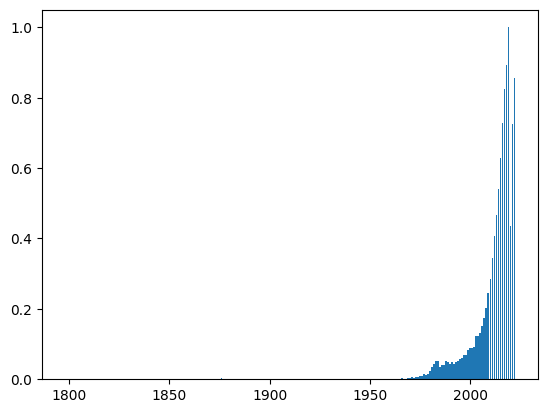

In [49]:
plt.bar(years,normalized_nom)

### Insight: It seems from after 1960 the number of marathons each year has incearsed leading to exponential increase from after the year 2000

In [119]:
import regex as re

In [120]:
def extract_country(event_name):
    match = re.search(r'\((.*?)\)', event_name)
    return match.group(1) if match else None

In [121]:
dataframe['Host_country'] = dataframe['Event name'].apply(extract_country)

In [122]:
dataframe['Host_country'].value_counts()

Host_country
USA                    1398540
FRA                    1098144
RSA                     918916
JPN                     579407
ITA                     341894
                        ...   
Luye to Jinlun               2
Jinlun to Fenggang           2
Day 5                        1
Chishang to Manzhou          1
DJI                          1
Name: count, Length: 672, dtype: int64

In [127]:
countries_and_races = dataframe['Host_country'].value_counts().nlargest(5)

In [128]:
countries_and_races.keys()

Index(['USA', 'FRA', 'RSA', 'JPN', 'ITA'], dtype='object', name='Host_country')

<Axes: xlabel='Host_country'>

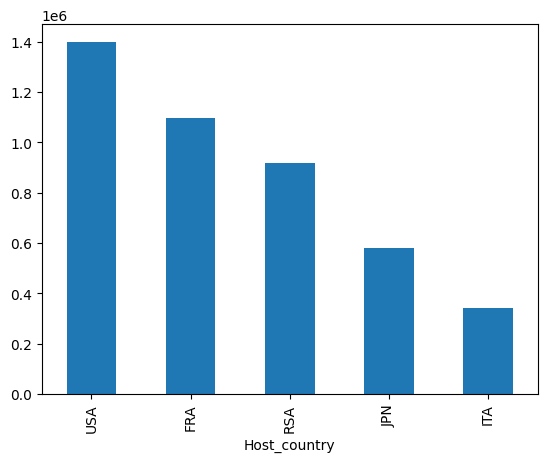

In [129]:
countries_and_races.plot.bar()

### Insight: USA has the highest number of races followed by FRA, GER, GBR and ITA

In [130]:
top5_countries = ['USA', 'FRA', 'RSA', 'JPN', 'ITA']

['Marine Corps 50km Marathon Race (USA)', 'JFK 50 Mile (USA)', 'Way Too Cool 50K Endurance Run (USA)']


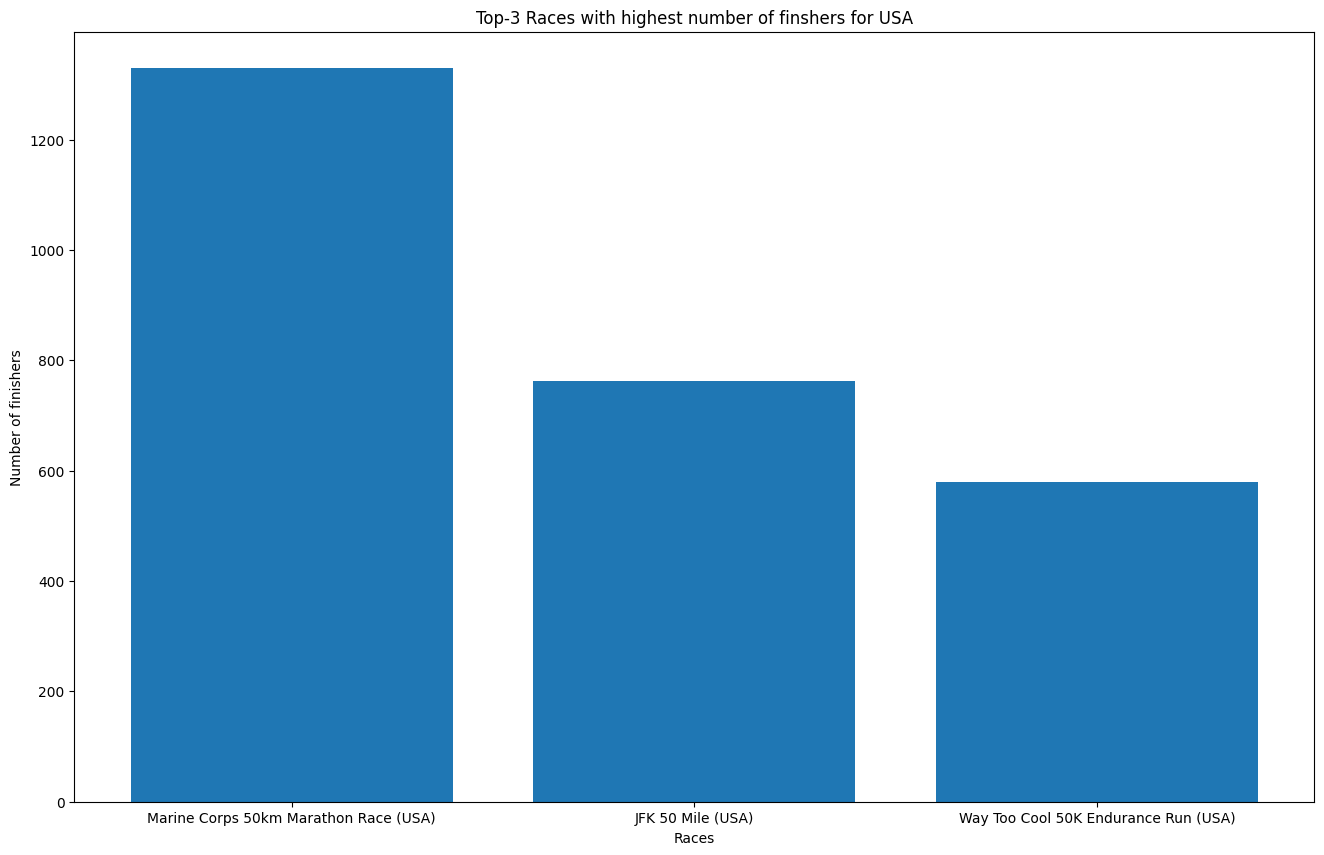

['La SaintéLyon 78 km (FRA)', 'La SaintéLyon 81 km (FRA)', 'La SaintéLyon 72 km (FRA)']


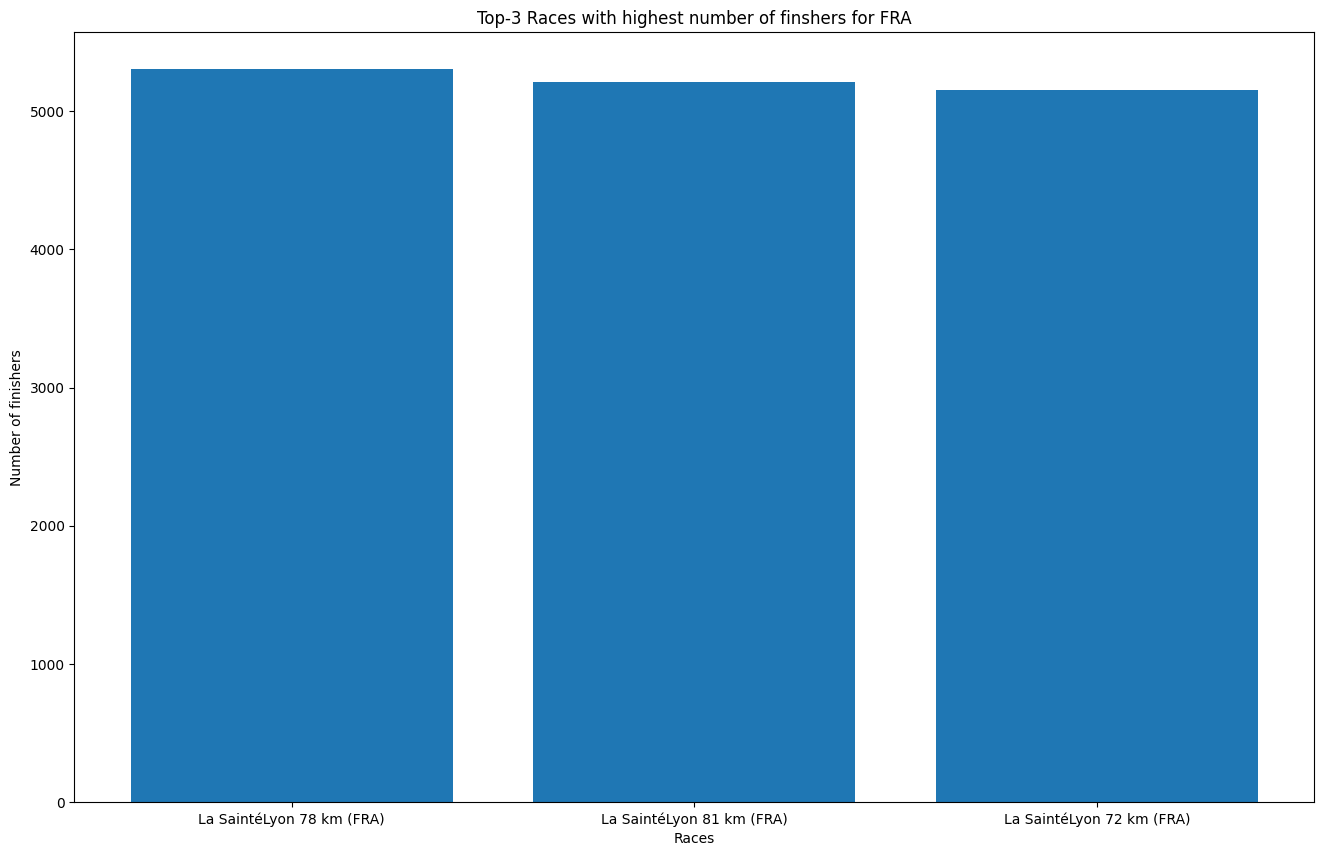

['Comrades Marathon - Down Run (RSA)', 'Comrades Marathon - Up Run (RSA)', 'Two Oceans Marathon (RSA)']


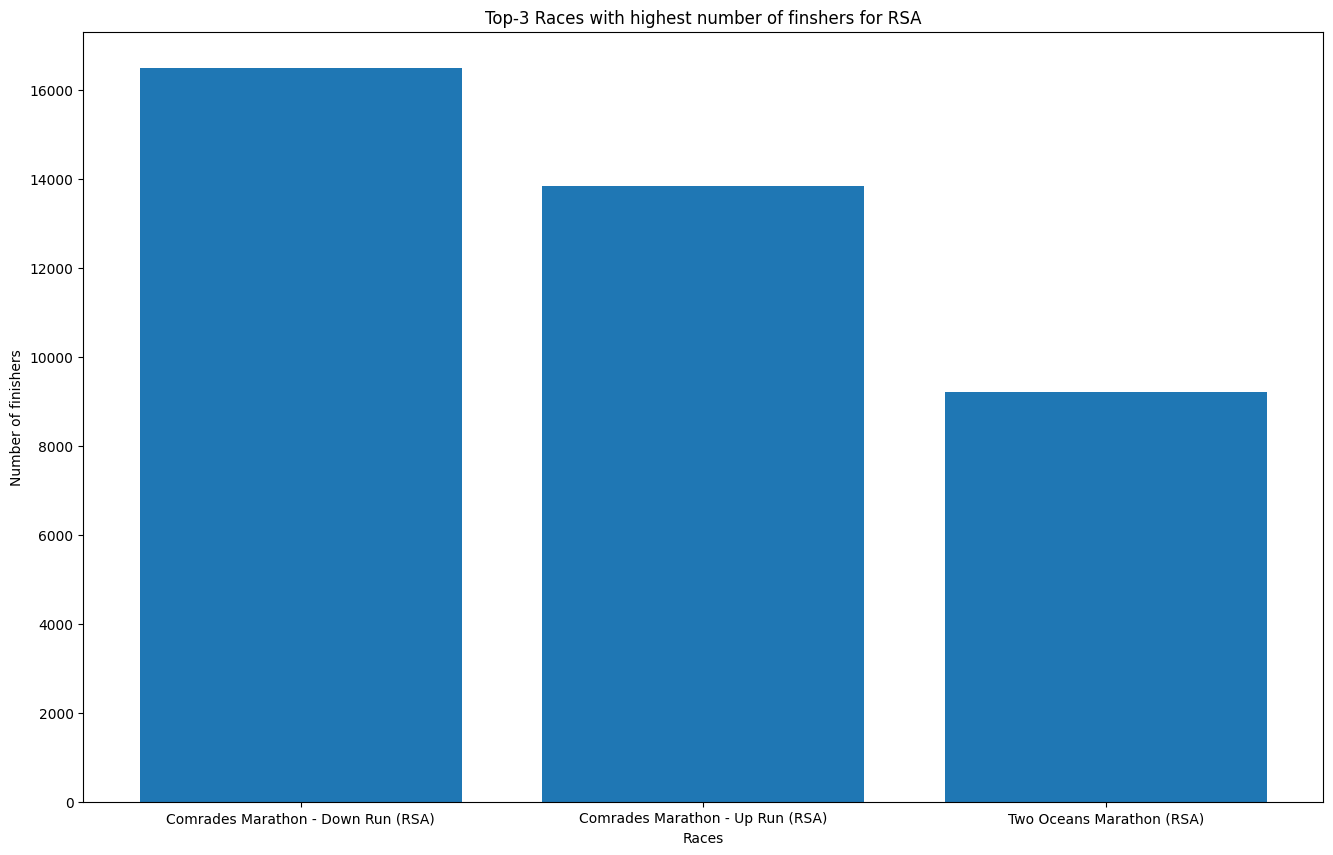

['Yukihashi to Beppu 100 km (JPN)', 'Lake Saroma 100 Km Ultramarathon (JPN)', 'Hida Takayama 100 km Ultramarathon (JPN)']


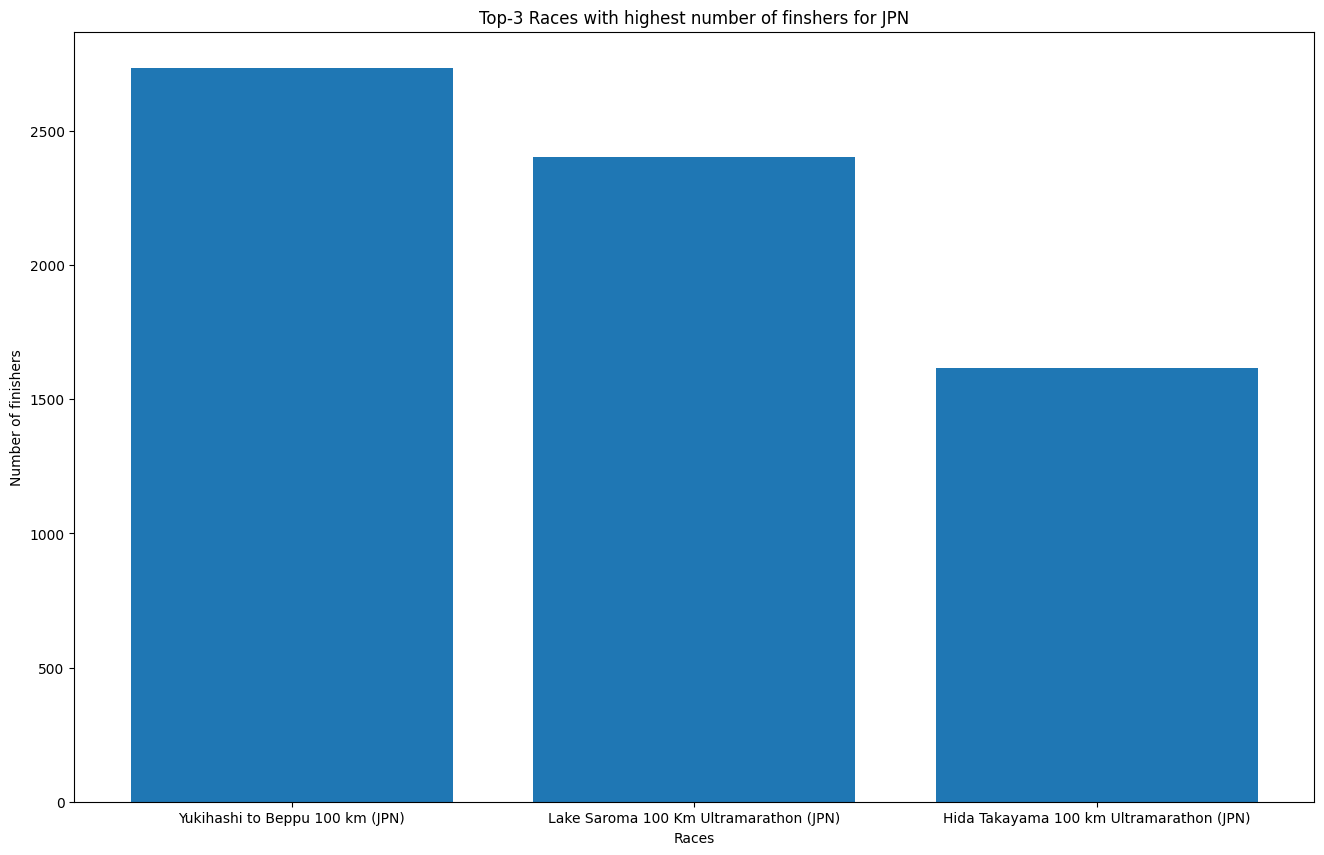

['100 km del Passatore, Firenze-Faenza (ITA)', 'Cortina Trail (ITA)', 'Lavaredo Ultra Trail (ITA)']


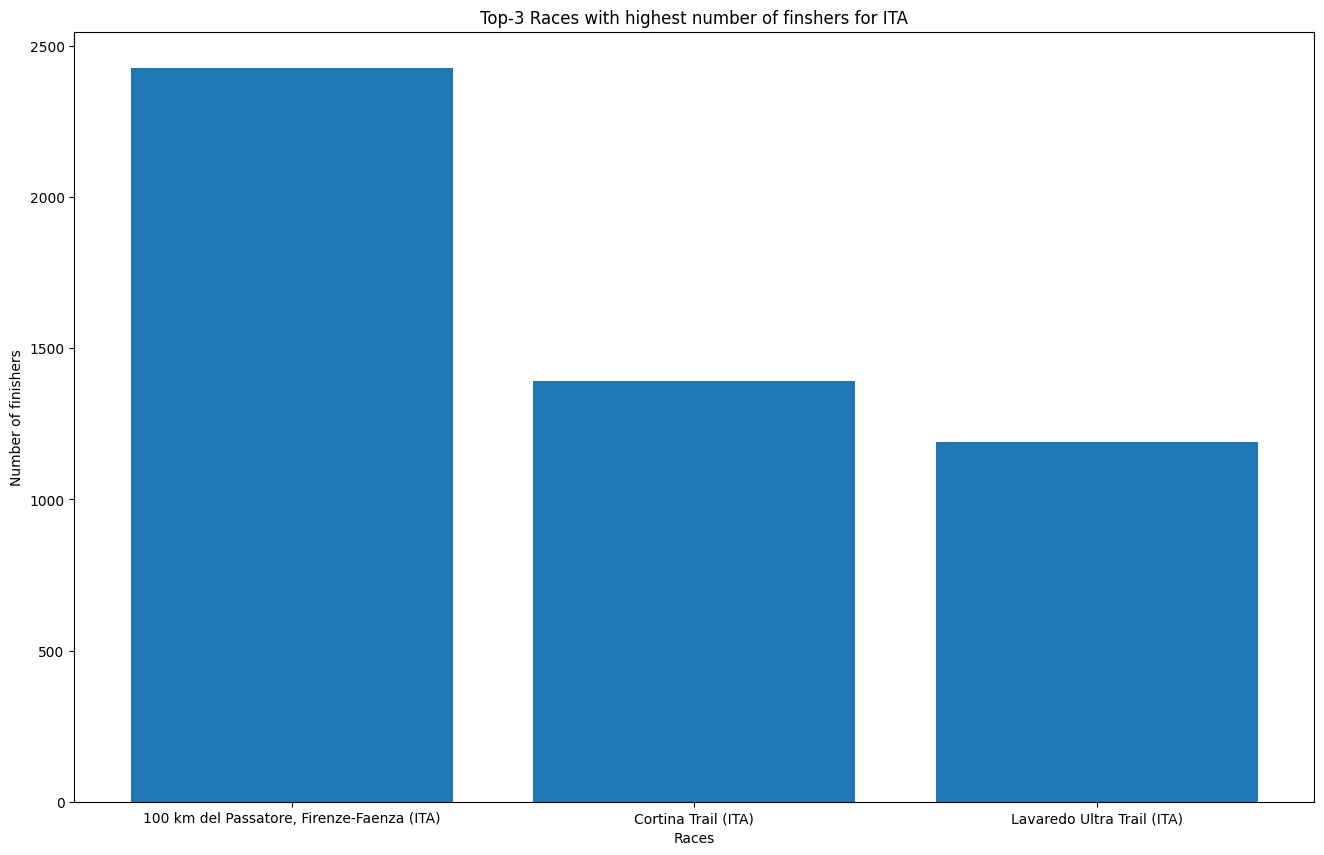

In [167]:
for country in top5_countries:
    event_finishers_byCountry = dataframe[dataframe['Host_country'] == country][['Event name','Event number of finishers']]
    event_finishers_byCountry.drop_duplicates(subset=['Event name'],inplace=True)
    top3_events_with_finishers = event_finishers_byCountry.loc[event_finishers_byCountry['Event number of finishers'].nlargest(3).index]
    print(top3_events_with_finishers['Event name'].tolist())
    plt.figure(figsize=(16,10))
    plt.bar(x=top3_events_with_finishers['Event name'].tolist(),height=top3_events_with_finishers['Event number of finishers'].tolist())
    plt.title(f"Top-3 Races with highest number of finshers for {country}")
    plt.xlabel('Races')
    plt.ylabel('Number of finishers')
    plt.show()

### Insights:
### 1. Country: Top-3 Races with respect to finishers
####  - USA: Marine Corps 50km run, JFK 50 mile, Way too Cool 50k Endurance Run 
####  - FRA: La Saintelyon 78km, La Saintelyon 80km, La Saintelyon 72km 
####  - RSA: Comrades Marathon - Down Run, Comrades Marathon - Up Run, Two Oceans Marathon
####  - JPN: Yukihashi to Beppu 100km, Lake Saroma 100km Ultramarathon, Hida Takayama 100km Ultramarathon
####  - ITA: '100 km del Passatore, Firenze-Faenza', Cortina Trail, Lavaredo Ultra Trail 
### 2. France has a very high finisher ratio with lots of people finishing multiple marathons with >5000 ppl finishing all of the top 3 marathons in france
### 3. RSA has the largest number of finishers among the Top-5 countries in the Comrades Marathon - Down Run (>16000)

In [168]:
top_races = [['Marine Corps 50km Marathon Race (USA)', 'JFK 50 Mile (USA)', 'Way Too Cool 50K Endurance Run (USA)'],
            ['La SaintéLyon 78 km (FRA)', 'La SaintéLyon 81 km (FRA)', 'La SaintéLyon 72 km (FRA)'],
            ['Comrades Marathon - Down Run (RSA)', 'Comrades Marathon - Up Run (RSA)', 'Two Oceans Marathon (RSA)'],
            ['Yukihashi to Beppu 100 km (JPN)', 'Lake Saroma 100 Km Ultramarathon (JPN)', 'Hida Takayama 100 km Ultramarathon (JPN)'],
            ['100 km del Passatore, Firenze-Faenza (ITA)', 'Cortina Trail (ITA)', 'Lavaredo Ultra Trail (ITA)']]

In [169]:
flat_top_races = [event for sublist in top_races for event in sublist]
filtered_df = dataframe[dataframe['Event name'].isin(flat_top_races)]

In [192]:
result_df = filtered_df[['Event name', 'Event distance/length']]
result_df = result_df.drop_duplicates(subset=['Event name'])
result_df

,Event name,Event distance/length
35402,Way Too Cool 50K Endurance Run (USA),50km
171454,Two Oceans Marathon (RSA),56km
210076,Comrades Marathon - Down Run (RSA),90km
227434,Hida Takayama 100 km Ultramarathon (JPN),100km
260679,"100 km del Passatore, Firenze-Faenza (ITA)",100km
387632,Lake Saroma 100 Km Ultramarathon (JPN),100km
391545,Cortina Trail (ITA),48km
400569,Lavaredo Ultra Trail (ITA),120km
607698,La SaintéLyon 81 km (FRA),81km
628483,JFK 50 Mile (USA),50mi


#### Insight: Highest distance here is Lavaredo Trail (ITA) while the least is Cortina Trail (ITA)

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    1503
F     812
Name: count, dtype: int64


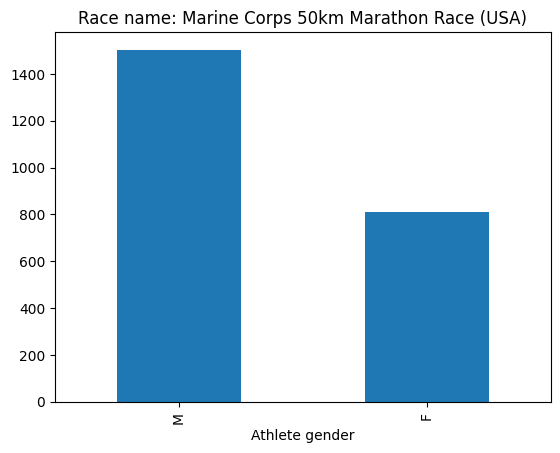

Athlete gender
M    25320
F     5631
Name: count, dtype: int64


/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


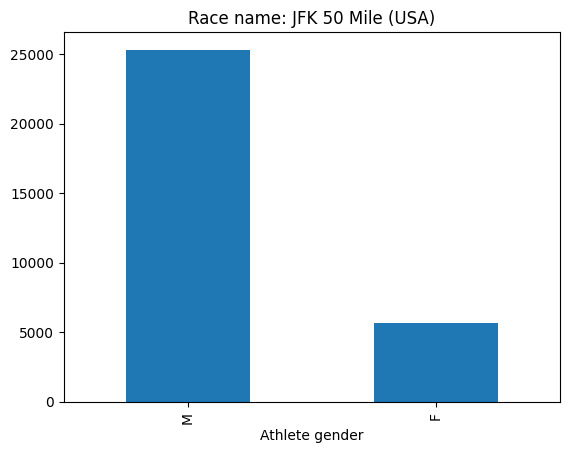

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    10418
F     5826
Name: count, dtype: int64


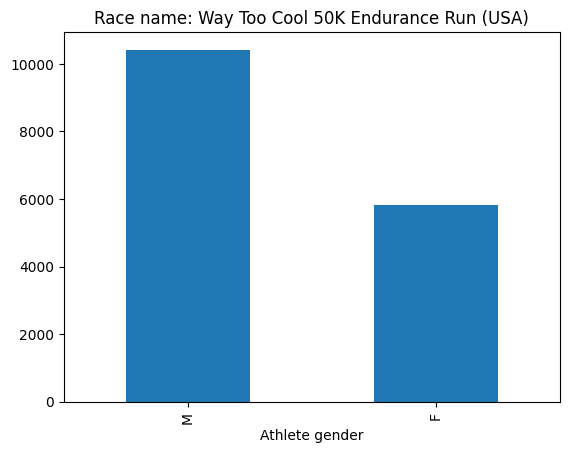

Athlete gender
M    4730
F     575
Name: count, dtype: int64


/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


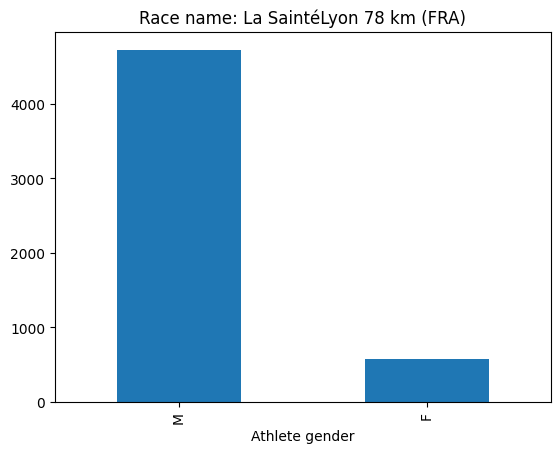

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    4742
F     465
Name: count, dtype: int64


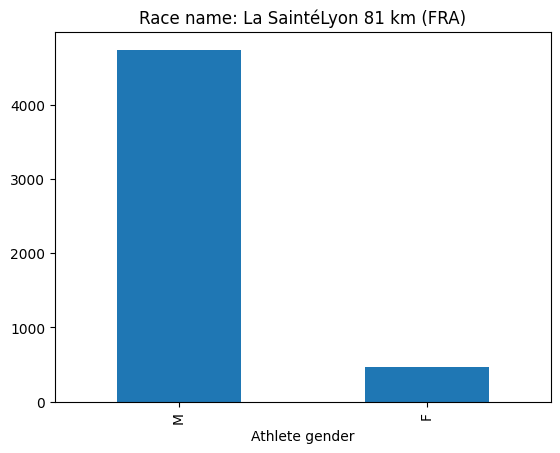

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    14718
F     1549
Name: count, dtype: int64


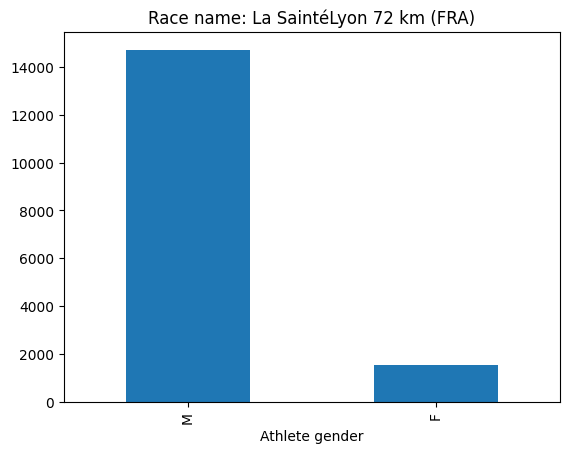

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    30167
F     3702
Name: count, dtype: int64


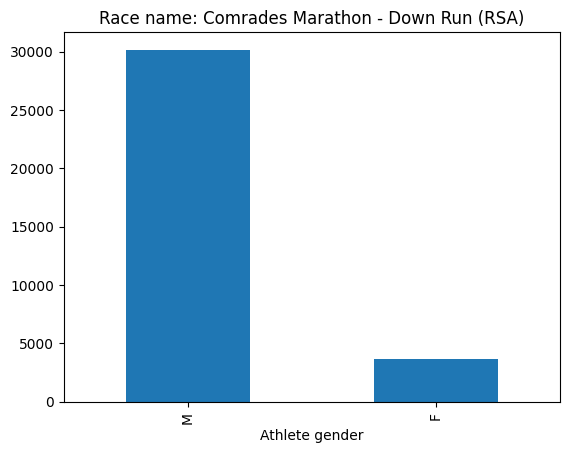

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    173631
F     27614
Name: count, dtype: int64


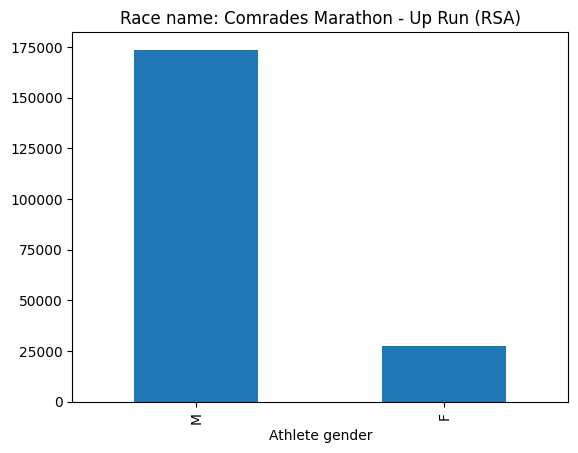

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    216651
F     46923
Name: count, dtype: int64


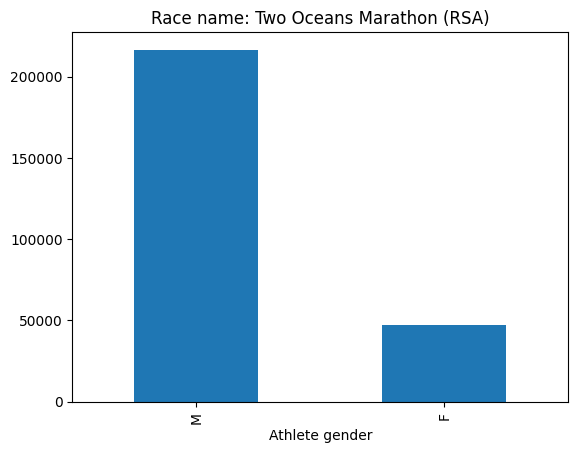

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    29142
F     7494
Name: count, dtype: int64


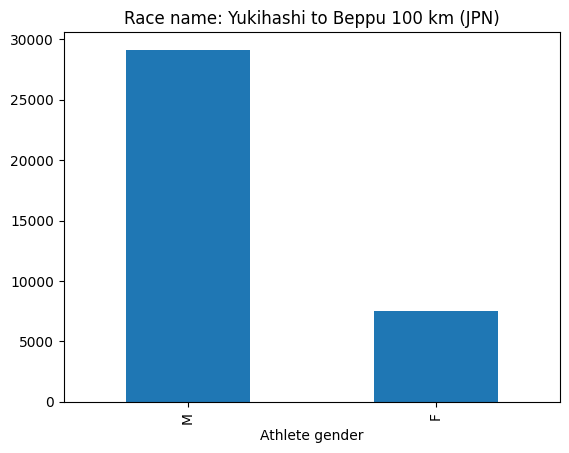

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    21664
F     3903
Name: count, dtype: int64


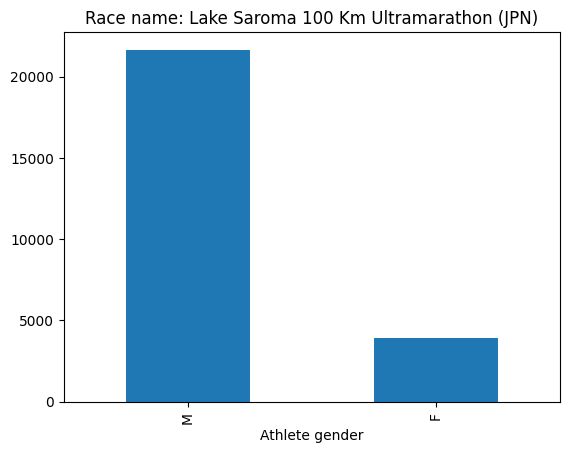

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    9976
F    1358
Name: count, dtype: int64


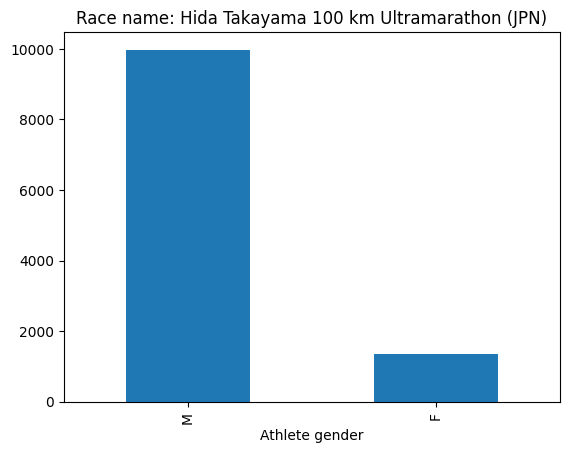

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    50376
F     5222
Name: count, dtype: int64


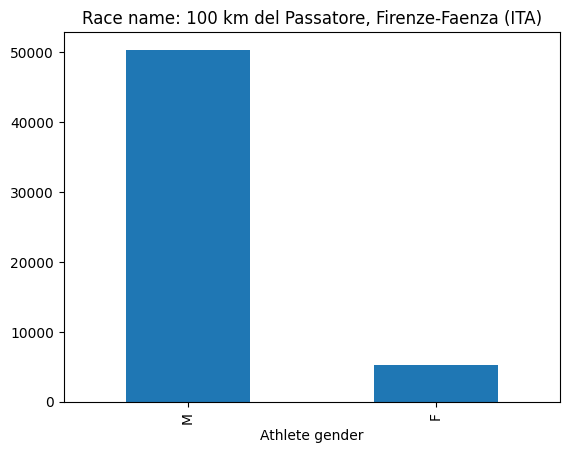

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    4845
F    1874
Name: count, dtype: int64


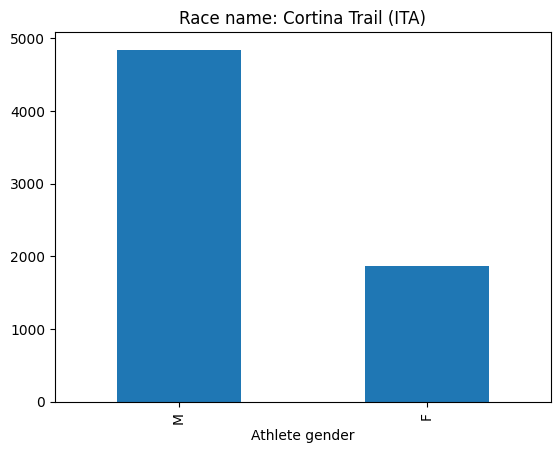

/tmp/ipykernel_32/3452781834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)


Athlete gender
M    4868
F     661
Name: count, dtype: int64


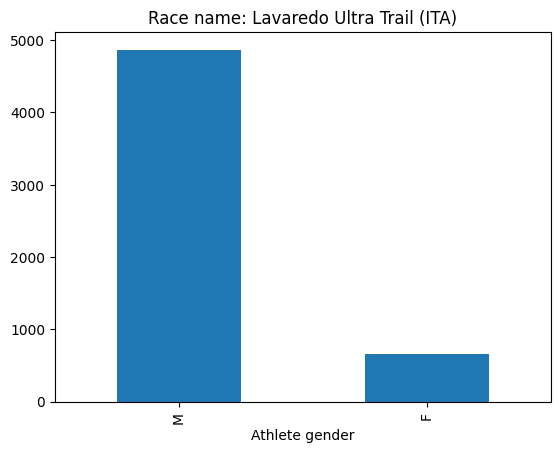

In [220]:
for race in flat_top_races:
    race_finisher_gender_ratio = dataframe[(dataframe['Event name'] == race) & (dataframe['Event distance/length'] == result_df[result_df['Event name'] == race]['Event distance/length'].values[0])]['Athlete gender']
    race_finisher_gender_ratio.fillna(race_finisher_gender_ratio.mode(),inplace=True)
    race_finisher_gender_ratio.value_counts().plot.bar()
    print(race_finisher_gender_ratio.value_counts())
    plt.title(f'Race name: {race}')
    plt.show()

### Insights:
#### Race name: Gender Ratio (Male / Female)
#### Marine Corps 50km Marathon Race (USA): 1053/812
#### JFK 50 Mile (USA): 25320/5631
#### Way Too Cool 50K Endurance Run (USA): 10418/5826
#### La SaintéLyon 78 km (FRA): 4730/575
#### La SaintéLyon 81 km (FRA): 4742/465
#### La SaintéLyon 72 km (FRA): 14718/1549
#### Comrades Marathon - Down Run (RSA): 30167/3702
#### Comrades Marathon - Up Run (RSA): 173631/27614
#### Two Oceans Marathon (RSA): 216651/46923
#### Yukihashi to Beppu 100 km (JPN): 29142/7494
#### Lake Saroma 100 Km Ultramarathon (JPN): 21664/3903
#### Hida Takayama 100 km Ultramarathon (JPN): 9976/1358
#### 100 km del Passatore, Firenze-Faenza (ITA): 50376/5222
#### Cortina Trail (ITA): 4845/1874
#### Lavaredo Ultra Trail (ITA): 4868/661

In [242]:
df_filtered = pd.merge(dataframe, result_df, on=['Event name', 'Event distance/length'])

In [268]:
analysis_time_df = df_filtered[['Event name','Event distance/length','Athlete gender','Athlete performance']]

In [269]:
analysis_time_df['hour']=analysis_time_df['Athlete performance'].str.split(':').str.get(0)
analysis_time_df['hour']=analysis_time_df['hour'].astype('float64')
analysis_time_df['min']=analysis_time_df['Athlete performance'].str.split(':').str.get(1)
analysis_time_df['min']=analysis_time_df['min'].astype('float64')
analysis_time_df['total_hour']=(analysis_time_df['hour']+(analysis_time_df['min'])/60).round(2)

/tmp/ipykernel_32/2938541546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_time_df['hour']=analysis_time_df['Athlete performance'].str.split(':').str.get(0)
/tmp/ipykernel_32/2938541546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_time_df['hour']=analysis_time_df['hour'].astype('float64')
/tmp/ipykernel_32/2938541546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [270]:
analysis_time_df['total_hour'].fillna(analysis_time_df['total_hour'].median())

0         3.30
1         3.30
2         3.33
3         3.42
4         3.45
          ... 
716355    8.13
716356    8.53
716357    8.53
716358    8.58
716359    8.92
Name: total_hour, Length: 716360, dtype: float64

In [271]:
analysis_time_df.head(5)

,Event name,Event distance/length,Athlete gender,Athlete performance,hour,min,total_hour
0,Way Too Cool 50K Endurance Run (USA),50km,M,3:18:04 h,3.0,18.0,3.30
1,Way Too Cool 50K Endurance Run (USA),50km,M,3:18:37 h,3.0,18.0,3.30
2,Way Too Cool 50K Endurance Run (USA),50km,M,3:20:57 h,3.0,20.0,3.33
3,Way Too Cool 50K Endurance Run (USA),50km,M,3:25:30 h,3.0,25.0,3.42
4,Way Too Cool 50K Endurance Run (USA),50km,M,3:27:32 h,3.0,27.0,3.45


In [272]:
avg_male_time = analysis_time_df[analysis_time_df['Athlete gender']=='M']['total_hour'].mean()
avg_female_time = analysis_time_df[analysis_time_df['Athlete gender']=='F']['total_hour'].mean()

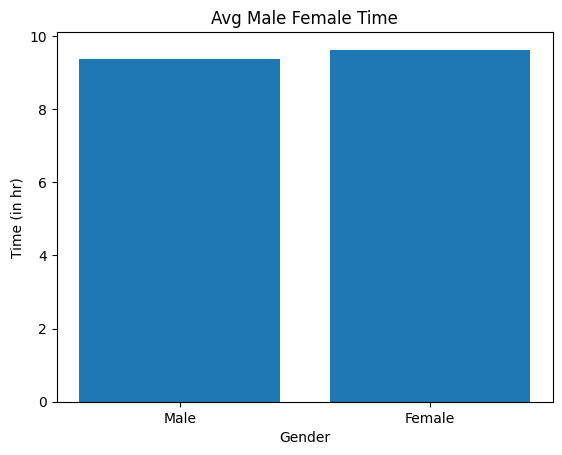

In [273]:
labels = ['Male','Female']
height = [avg_male_time,avg_female_time]
plt.bar(x=labels,height=height)
plt.title('Avg Male Female Time')
plt.xlabel('Gender')
plt.ylabel('Time (in hr)')
plt.show()

### Insight: Females take on an average slightly more time than males to complete a marathon

Avg male time:5.690998003992016, Avg female time: 5.971243842364533


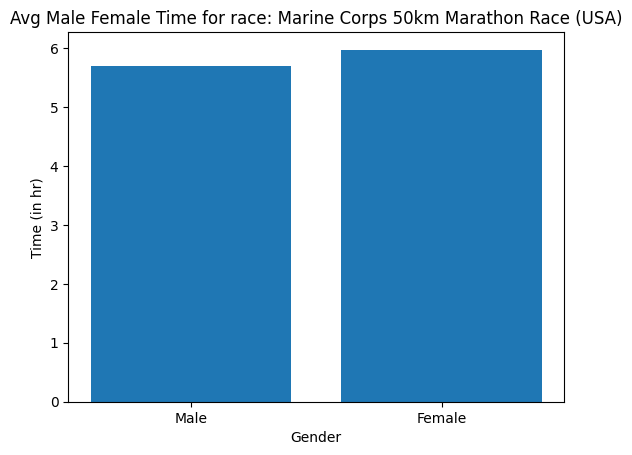

Avg male time:10.414572669826224, Avg female time: 10.828875865743207


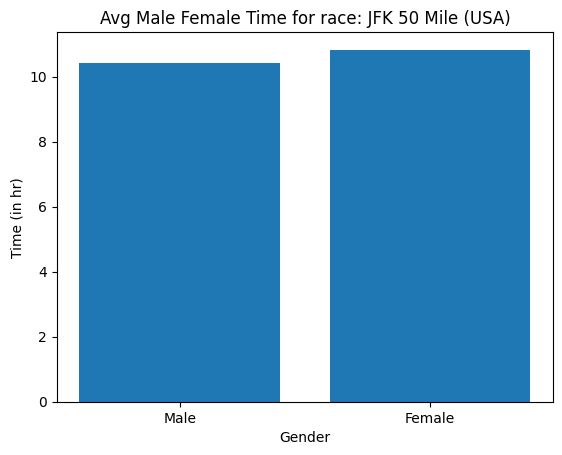

Avg male time:5.815995392589749, Avg female time: 6.474449021627188


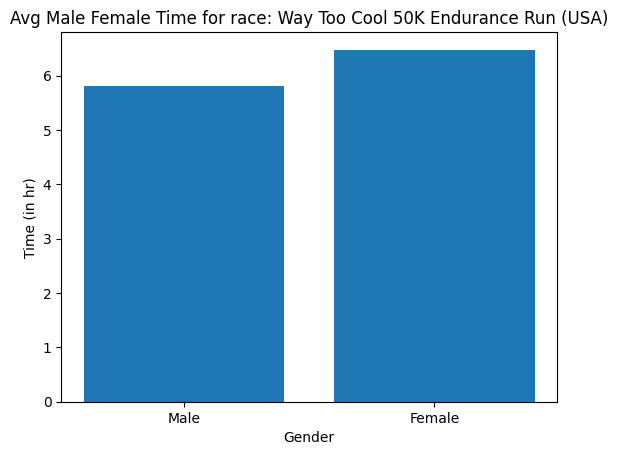

Avg male time:11.438420718816069, Avg female time: 12.421860869565217


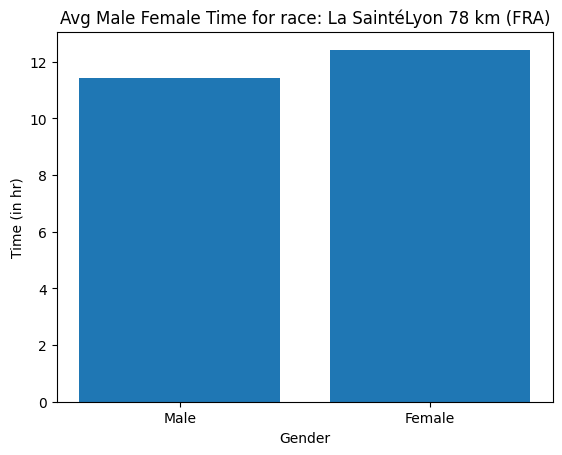

Avg male time:12.18561999156474, Avg female time: 13.225806451612904


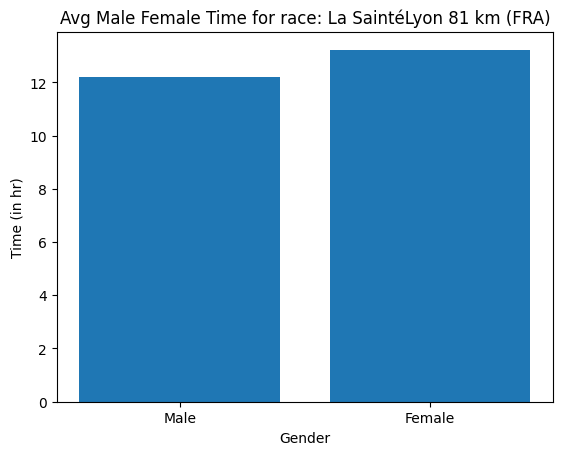

Avg male time:10.227212257100149, Avg female time: 11.180871530019367


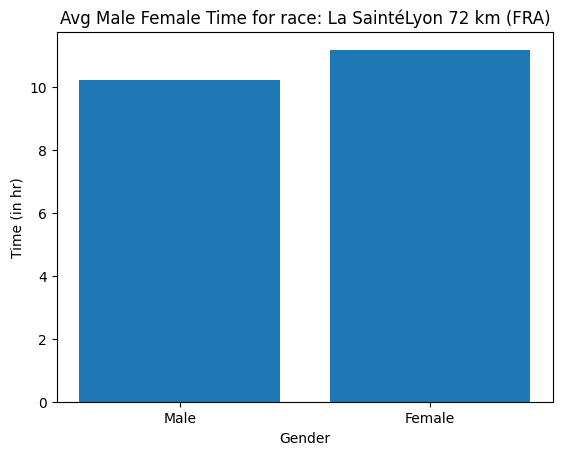

Avg male time:9.54537706765671, Avg female time: 10.711863857374393


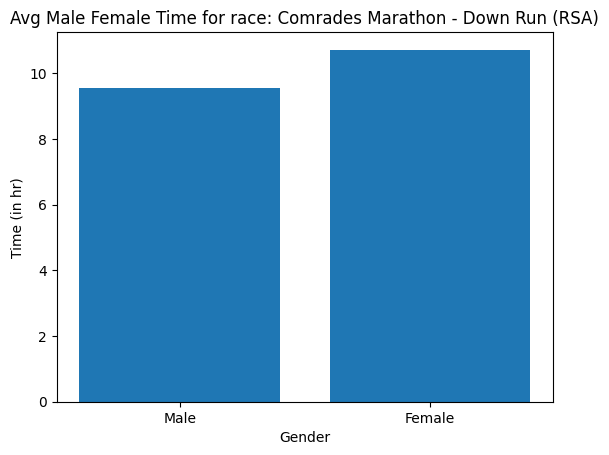

Avg male time:9.85022634207025, Avg female time: 10.58572318389223


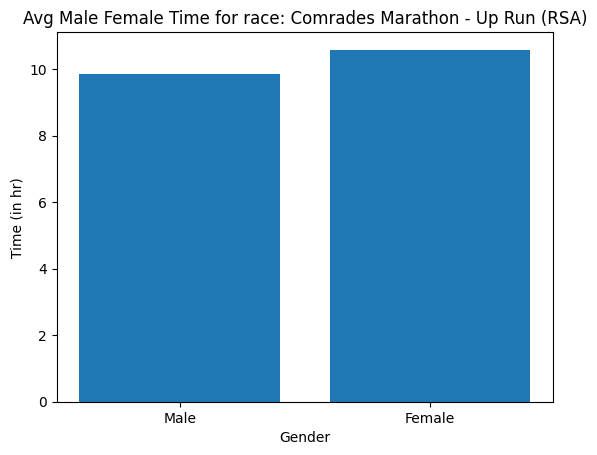

Avg male time:5.433693451680351, Avg female time: 5.952128380538328


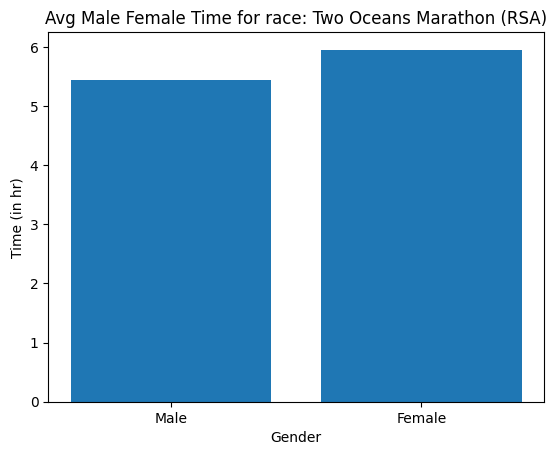

Avg male time:21.806367442179674, Avg female time: 23.251326394448892


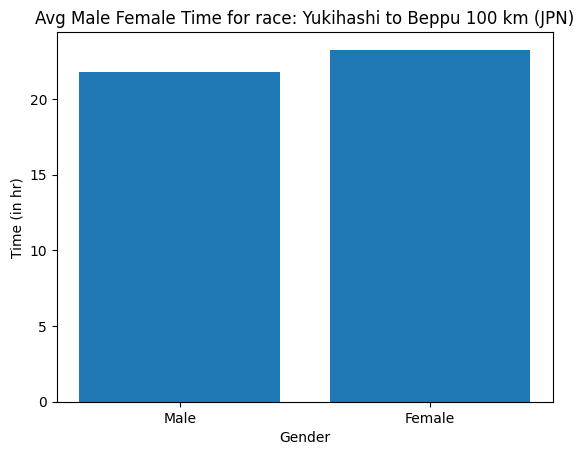

Avg male time:11.361365398818316, Avg female time: 11.554022546758905


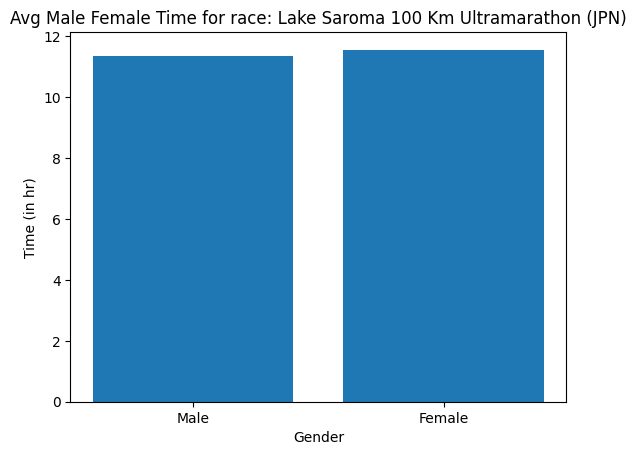

Avg male time:12.329730352846832, Avg female time: 12.710346097201768


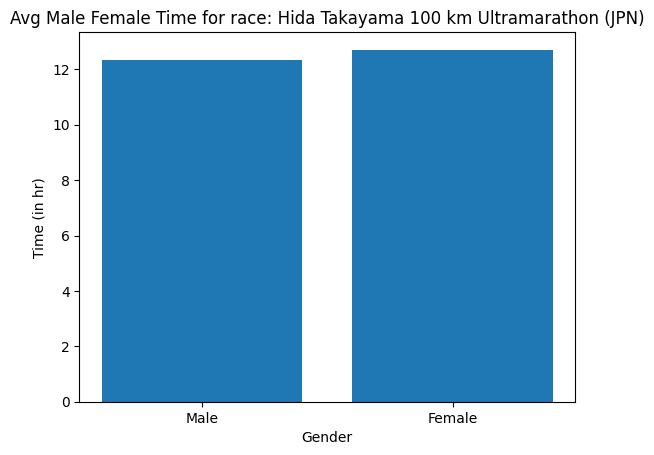

Avg male time:14.356417540098457, Avg female time: 14.929613175028726


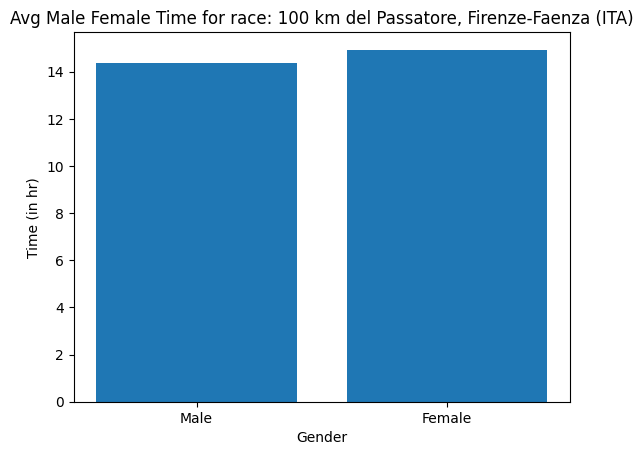

Avg male time:8.345007223942208, Avg female time: 9.118644610458912


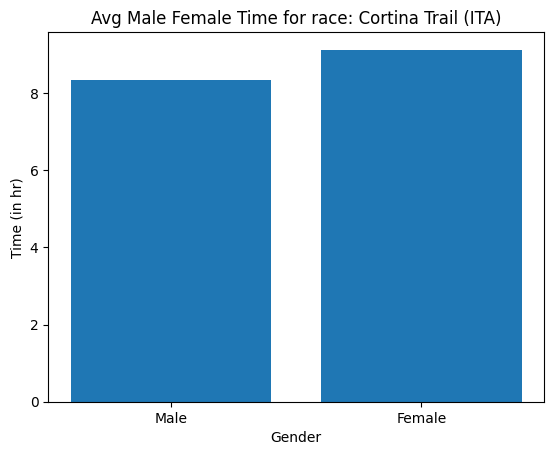

Avg male time:23.00421322925226, Avg female time: 23.99411497730711


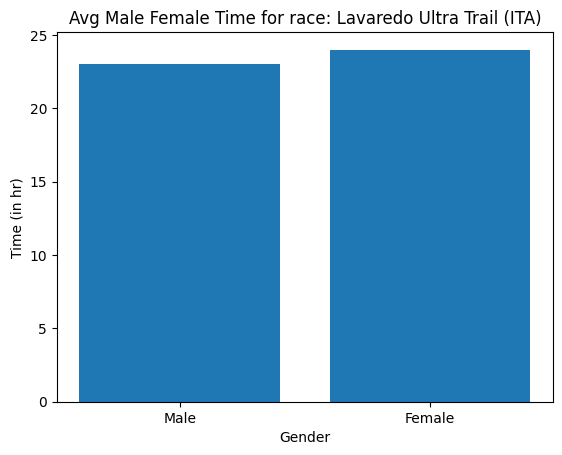

In [274]:
for race in flat_top_races:
    race_time_dist_df = analysis_time_df[analysis_time_df['Event name'] == race]
    avg_male_time = race_time_dist_df[race_time_dist_df['Athlete gender']=='M']['total_hour'].mean()
    avg_female_time = race_time_dist_df[race_time_dist_df['Athlete gender']=='F']['total_hour'].mean()
    labels = ['Male','Female']
    print(f'Avg male time:{avg_male_time}, Avg female time: {avg_female_time}')
    heights = [avg_male_time,avg_female_time]
    plt.bar(x=labels,height=heights)
    plt.title(f'Avg Male Female Time for race: {race}')
    plt.xlabel('Gender')
    plt.ylabel('Time (in hr)')
    plt.show()

### Insights:
#### Race : Avg Time Distribution (in hr) (Male/Female)
#### Marine Corps 50km Marathon Race (USA): 5.69/5.97
#### JFK 50 Mile (USA): 10.41/10.82
#### Way Too Cool 50K Endurance Run (USA): 5.81/6.47
#### La SaintéLyon 78 km (FRA): 11.44/12.42
#### La SaintéLyon 81 km (FRA): 12.18/13.22
#### La SaintéLyon 72 km (FRA): 10.23/11.18
#### Comrades Marathon - Down Run (RSA): 9.54/10.71
#### Comrades Marathon - Up Run (RSA): 9.85/10.58
#### Two Oceans Marathon (RSA): 5.43/5.95
#### Yukihashi to Beppu 100 km (JPN): 21.81/23.25
#### Lake Saroma 100 Km Ultramarathon (JPN): 11.36/11.55
#### Hida Takayama 100 km Ultramarathon (JPN): 12.33/12.71
#### 100 km del Passatore, Firenze-Faenza (ITA): 14.35/14.93
#### Cortina Trail (ITA): 8.34/9.12
#### Lavaredo Ultra Trail (ITA): 23.00/23.99

In [262]:
analysis_speed_df = df_filtered[['Event name','Event distance/length','Athlete gender','Athlete average speed']]

In [275]:
analysis_speed_df['Athlete average speed'].fillna(analysis_speed_df['Athlete average speed'].astype(float).median())

0         15.146
1         15.104
2         14.929
3         14.599
4         14.456
           ...  
716355    6138.0
716356    5857.0
716357    5848.0
716358    5815.0
716359    5602.0
Name: Athlete average speed, Length: 716360, dtype: object

In [276]:
analysis_speed_df.head()

,Event name,Event distance/length,Athlete gender,Athlete average speed
0,Way Too Cool 50K Endurance Run (USA),50km,M,15.146
1,Way Too Cool 50K Endurance Run (USA),50km,M,15.104
2,Way Too Cool 50K Endurance Run (USA),50km,M,14.929
3,Way Too Cool 50K Endurance Run (USA),50km,M,14.599
4,Way Too Cool 50K Endurance Run (USA),50km,M,14.456


In [281]:
avg_male_speed = analysis_speed_df[analysis_speed_df['Athlete gender']=='M']['Athlete average speed'].astype(float).median()
avg_female_speed = analysis_speed_df[analysis_speed_df['Athlete gender']=='F']['Athlete average speed'].astype(float).median()

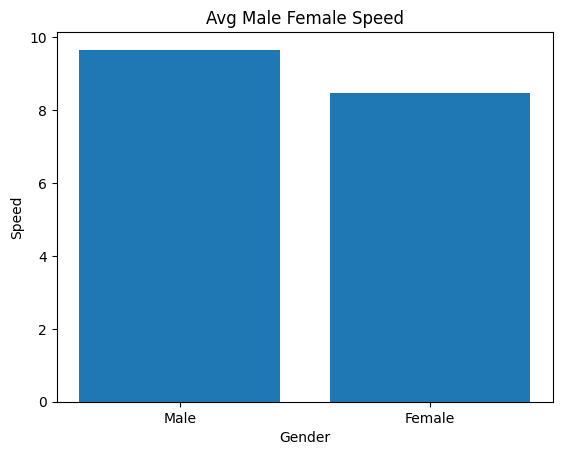

In [282]:
labels = ['Male','Female']
height = [avg_male_speed,avg_female_speed]
plt.bar(x=labels,height=height)
plt.title('Avg Male Female Speed')
plt.xlabel('Gender')
plt.ylabel('Speed')
plt.show()

### Insight: Average male speed is much higher compared to average female speed

Avg male speed:8.715, Avg female speed: 8.345500000000001


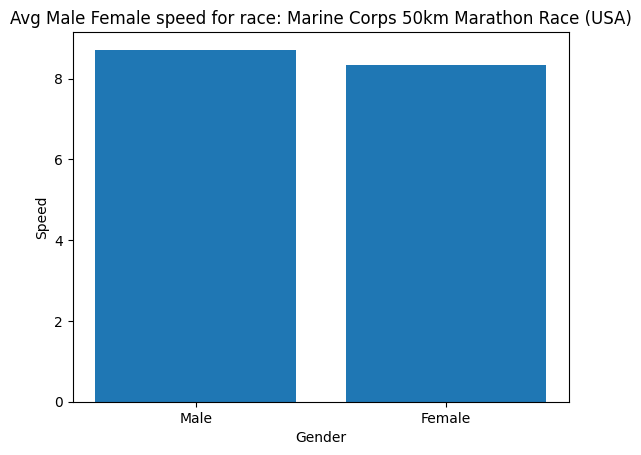

Avg male speed:8.53, Avg female speed: 7.549


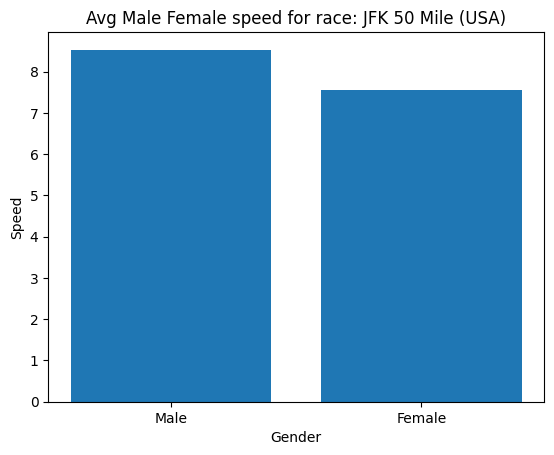

Avg male speed:8.887, Avg female speed: 7.816


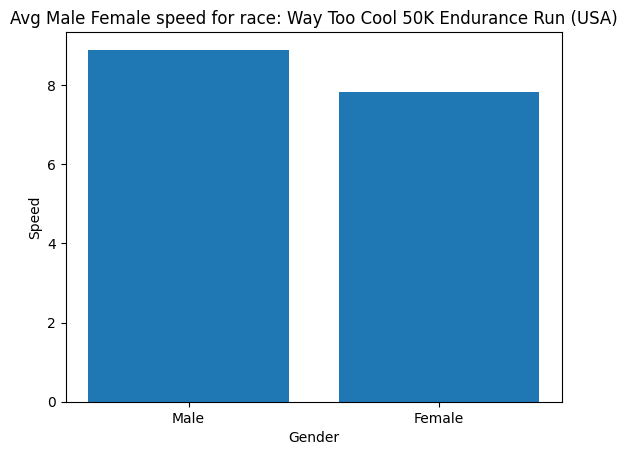

Avg male speed:6.865, Avg female speed: 6.241


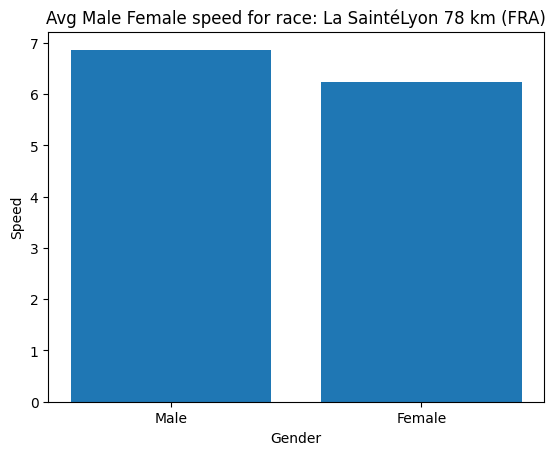

Avg male speed:6.6585, Avg female speed: 6.097


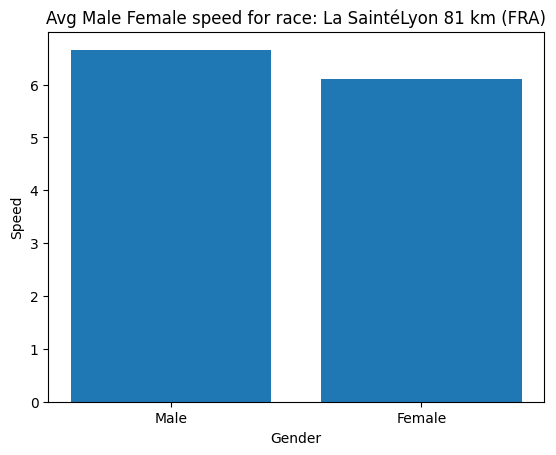

Avg male speed:7.103, Avg female speed: 6.477


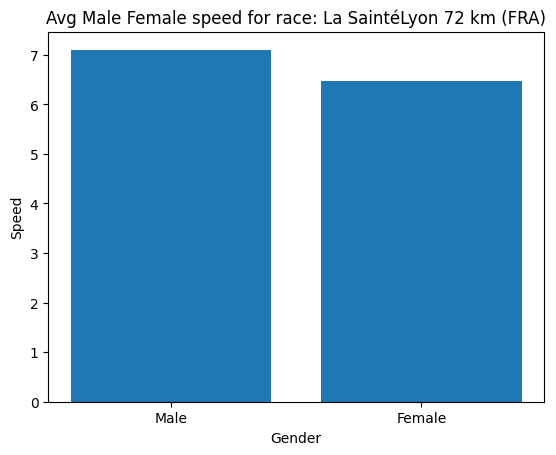

Avg male speed:8500.0, Avg female speed: 8.255


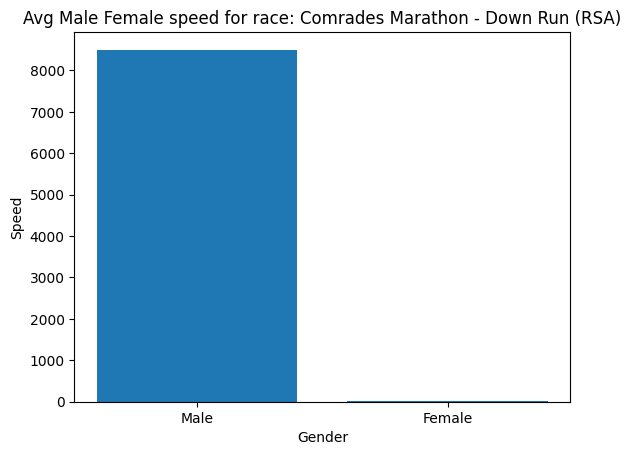

Avg male speed:9.384, Avg female speed: 8.142


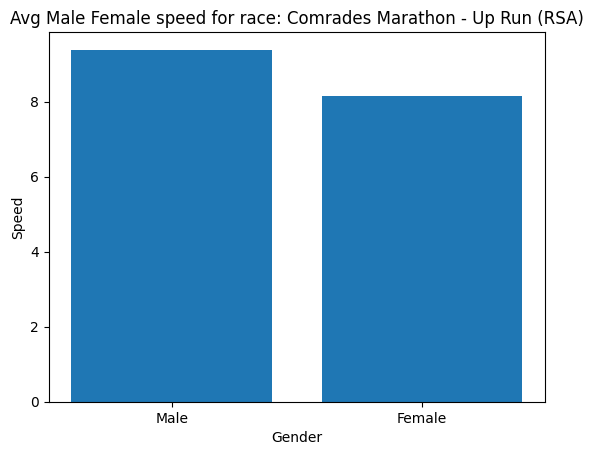

Avg male speed:11.167, Avg female speed: 9.46


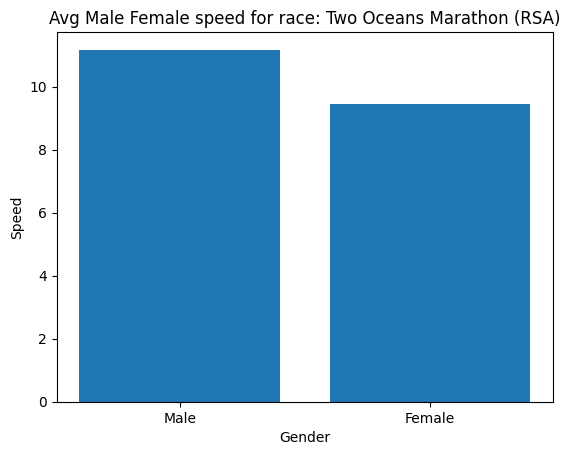

Avg male speed:4.505, Avg female speed: 4.164


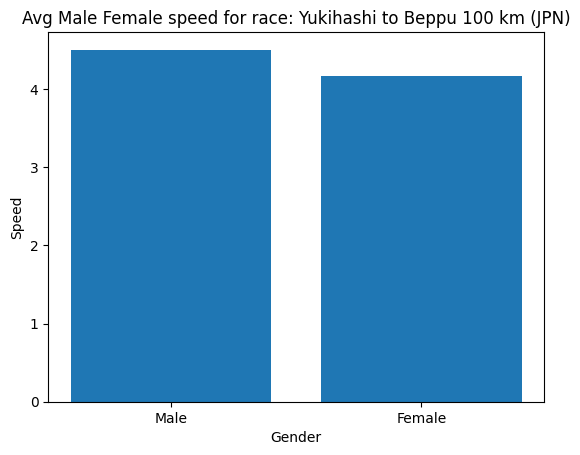

Avg male speed:8.502, Avg female speed: 8.377


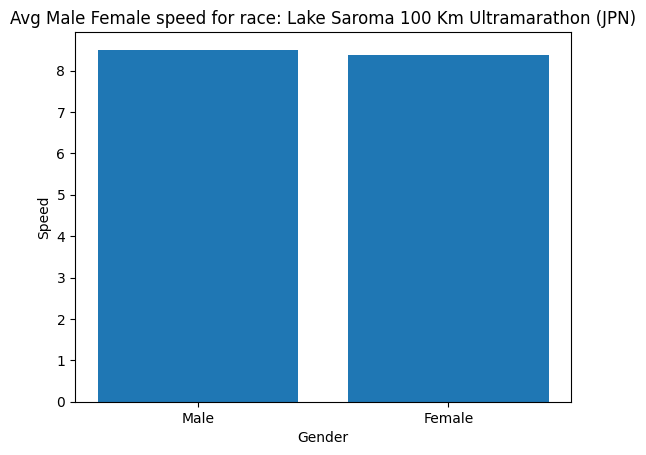

Avg male speed:7.894, Avg female speed: 7.678


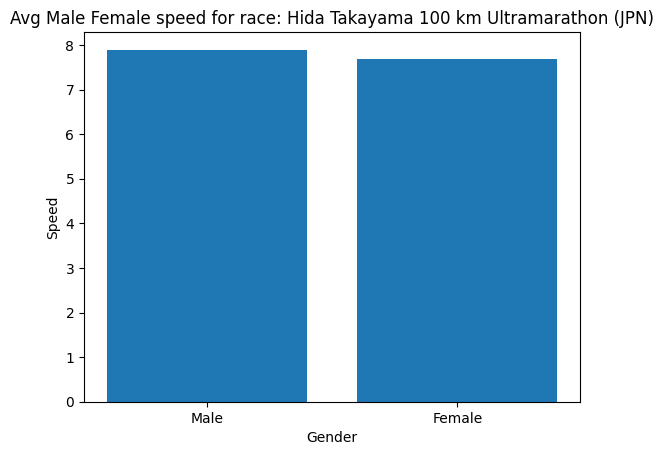

Avg male speed:9.7745, Avg female speed: 7.2615


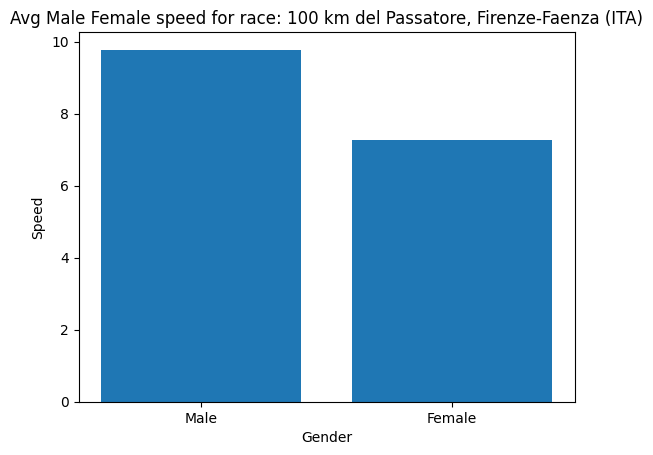

Avg male speed:5.781, Avg female speed: 5.242


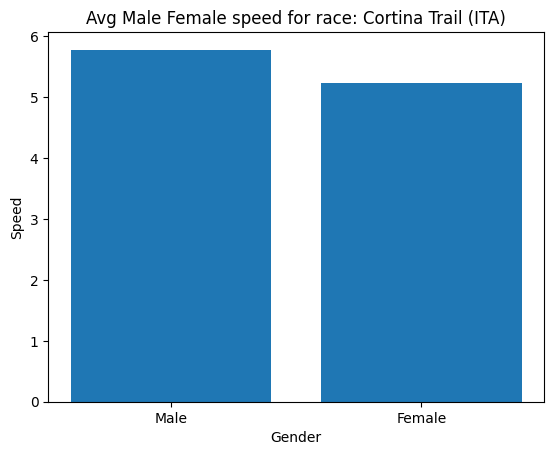

Avg male speed:5.1884999999999994, Avg female speed: 4.916


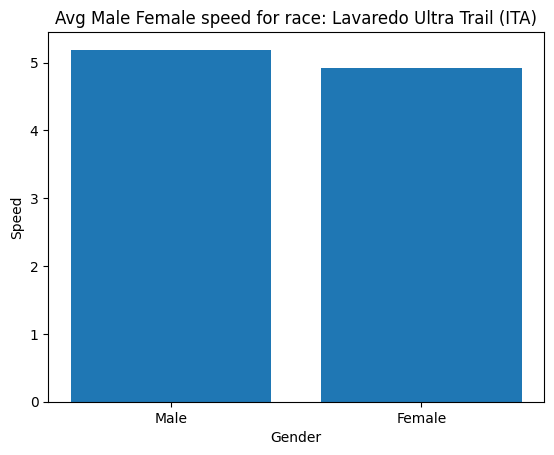

In [283]:
for race in flat_top_races:
    race_speed_dist_df = analysis_speed_df[analysis_speed_df['Event name'] == race]
    avg_male_speed = race_speed_dist_df[race_speed_dist_df['Athlete gender']=='M']['Athlete average speed'].astype(float).median()
    avg_female_speed = race_speed_dist_df[race_speed_dist_df['Athlete gender']=='F']['Athlete average speed'].astype(float).median()
    labels = ['Male','Female']
    print(f'Avg male speed:{avg_male_speed}, Avg female speed: {avg_female_speed}')
    heights = [avg_male_speed,avg_female_speed]
    plt.bar(x=labels,height=heights)
    plt.title(f'Avg Male Female speed for race: {race}')
    plt.xlabel('Gender')
    plt.ylabel('Speed')
    plt.show()

### Insights:
#### Race : Avg Speed Distribution (Male/Female)
#### Marine Corps 50km Marathon Race (USA): 8.71/8.34
#### JFK 50 Mile (USA): 8.53/7.54
#### Way Too Cool 50K Endurance Run (USA): 8.89/7.82
#### La SaintéLyon 78 km (FRA): 6.86/6.24
#### La SaintéLyon 81 km (FRA): 6.66/6.10
#### La SaintéLyon 72 km (FRA): 7.10/6.48
#### Comrades Marathon - Down Run (RSA): 8500/8.25
#### Comrades Marathon - Up Run (RSA): 9.39/8.14
#### Two Oceans Marathon (RSA): 11.17/9.46
#### Yukihashi to Beppu 100 km (JPN): 4.50/4.16
#### Lake Saroma 100 Km Ultramarathon (JPN): 8.50/8.38
#### Hida Takayama 100 km Ultramarathon (JPN): 7.89/7.68
#### 100 km del Passatore, Firenze-Faenza (ITA): 9.77/7.26
#### Cortina Trail (ITA): 5.78/5.24
#### Lavaredo Ultra Trail (ITA): 5.19/4.92

In [311]:
mode_age_category = df_filtered['Athlete age category'].mode().values[0]

In [312]:
df_filtered['Athlete age category'].fillna(mode_age_category,inplace=True)

/tmp/ipykernel_32/552734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['Athlete age category'].fillna(mode_age_category,inplace=True)


In [313]:
analysis_age_df = df_filtered[['Event name','Event distance/length','Athlete gender','Athlete age category']]

In [315]:
analysis_age_df['Athlete age category'].unique()

array(['M35', 'MU23', 'M23', 'W23', 'M50', 'M40', 'W35', 'M45', 'W40',
       'M55', 'W55', 'W45', 'M60', 'W50', 'W60', 'WU23', 'M65', 'M70',
       'W65', 'M75', 'W70', 'M90', 'W75', 'M80', 'M85', 'W80'],
      dtype=object)

Low: 25 high: 95 </br>
bins: <25 , 26-30, 31-35, 36-40, 41-45, 46-50, 51-55, 56-60, 61-65, 66-70, 71-75, 76-80, 81-85, 85-90, >90

In [316]:
age_bins = {
    '<25': range(0, 26),
    '26-30': range(26, 31),
    '31-35': range(31, 36),
    '36-40': range(36, 41),
    '41-45': range(41, 46),
    '46-50': range(46, 51),
    '51-55': range(51, 56),
    '56-60': range(56, 61),
    '61-65': range(61, 66),
    '66-70': range(66, 71),
    '71-75': range(71, 76),
    '76-80': range(76, 81),
    '81-85': range(81, 86),
    '86-90': range(86, 91),
    '>90': range(91, 200)
}

In [317]:
def get_age_bin(age_category):
    # Extract the age part and check for 'U' (under) prefix
    match = re.match(r'([MWF]+)(U?)(\d+)', age_category)
    if match:
        prefix, under, age = match.groups()
        age = int(age)
        if under == 'U':  # if 'U' is present, it's an under category
            age -= 1  # Adjust to fit the binning logic
        for bin_name, bin_range in age_bins.items():
            if age in bin_range:
                return bin_name
    return None

In [318]:
analysis_age_df['Athlete age category'] = analysis_age_df['Athlete age category'].apply(get_age_bin)

/tmp/ipykernel_32/1290918542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_age_df['Athlete age category'] = analysis_age_df['Athlete age category'].apply(get_age_bin)


In [319]:
analysis_age_df.head()

,Event name,Event distance/length,Athlete gender,Athlete age category
0,Way Too Cool 50K Endurance Run (USA),50km,M,31-35
1,Way Too Cool 50K Endurance Run (USA),50km,M,<25
2,Way Too Cool 50K Endurance Run (USA),50km,M,<25
3,Way Too Cool 50K Endurance Run (USA),50km,M,<25
4,Way Too Cool 50K Endurance Run (USA),50km,M,<25


<Axes: xlabel='Athlete age category'>

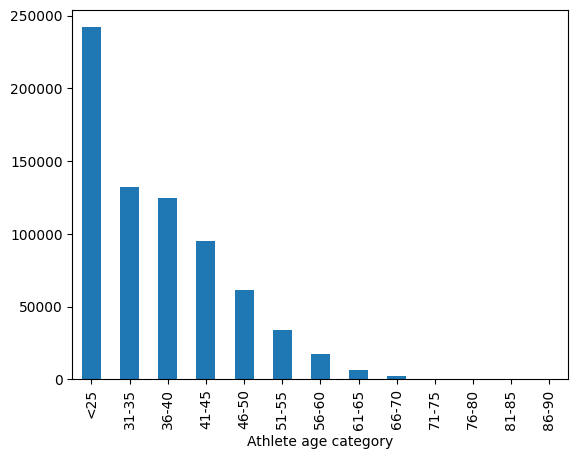

In [321]:
analysis_age_df['Athlete age category'].value_counts().plot.bar()

In [324]:
import seaborn as sns

<Axes: xlabel='Athlete age category', ylabel='count'>

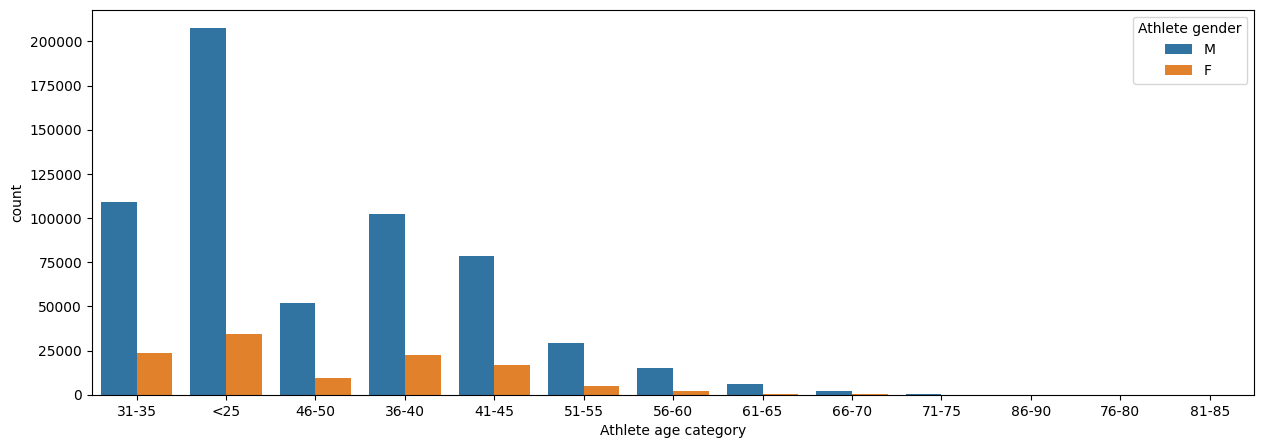

In [328]:
plt.figure(figsize=(15,5))
sns.countplot(analysis_age_df,x='Athlete age category',hue='Athlete gender')

### Insights: Majority are from the age category of <25 years in both the genders followed by people in age category of 31-35 and 36-40 years

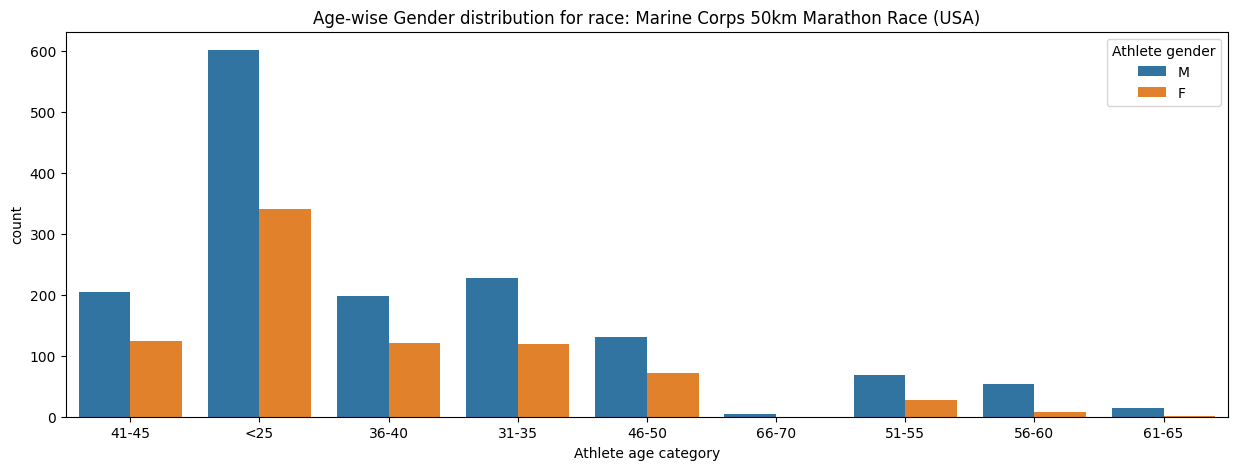

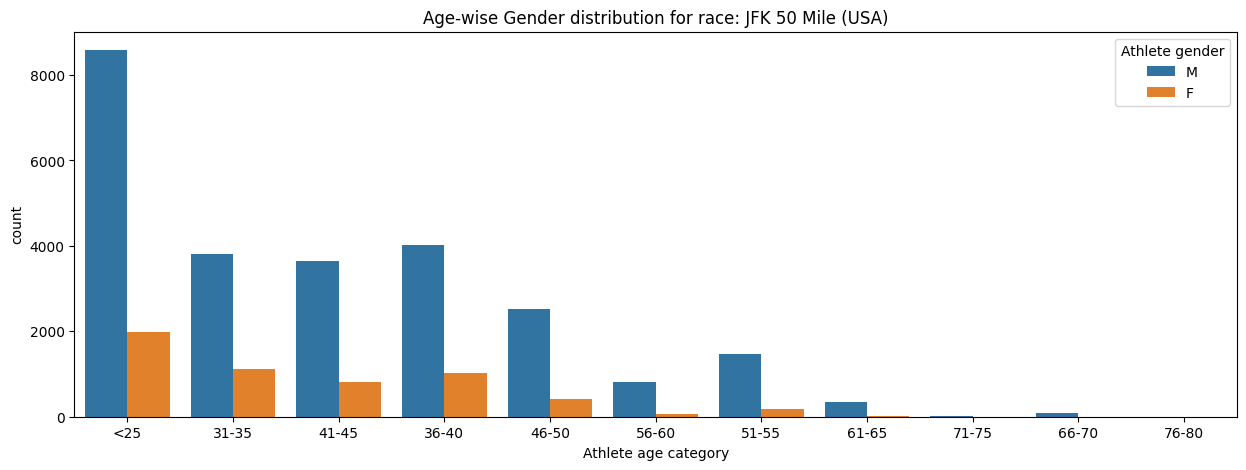

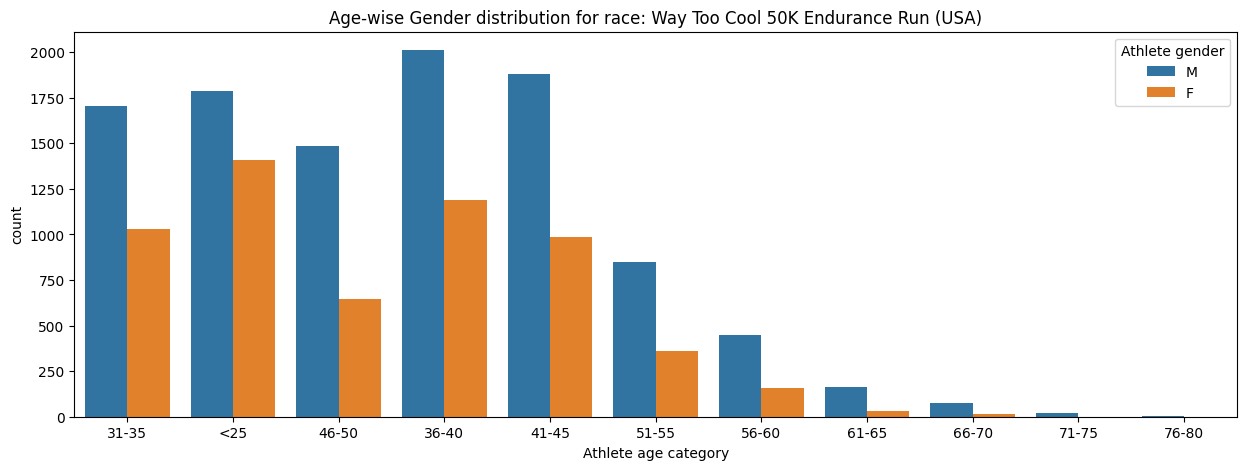

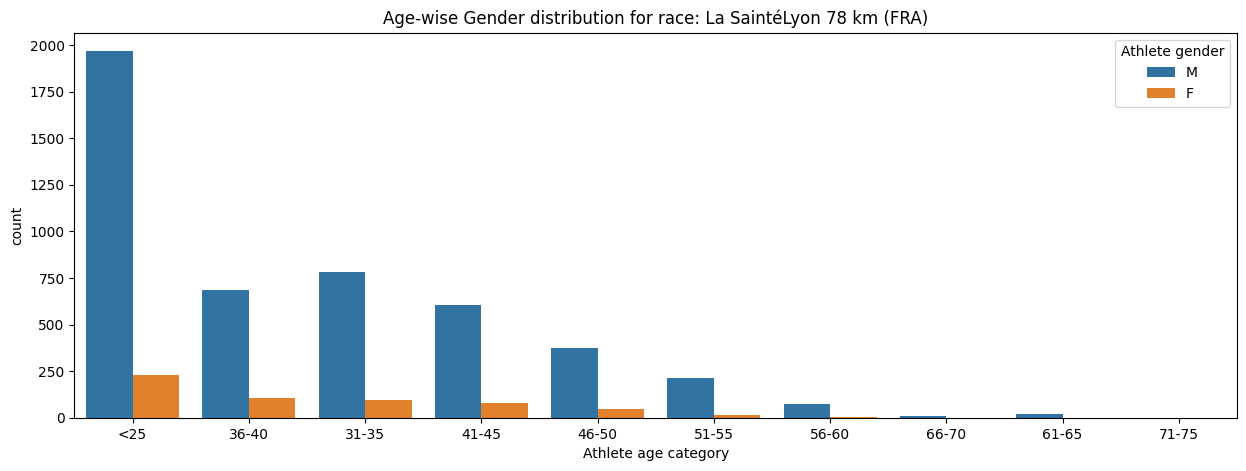

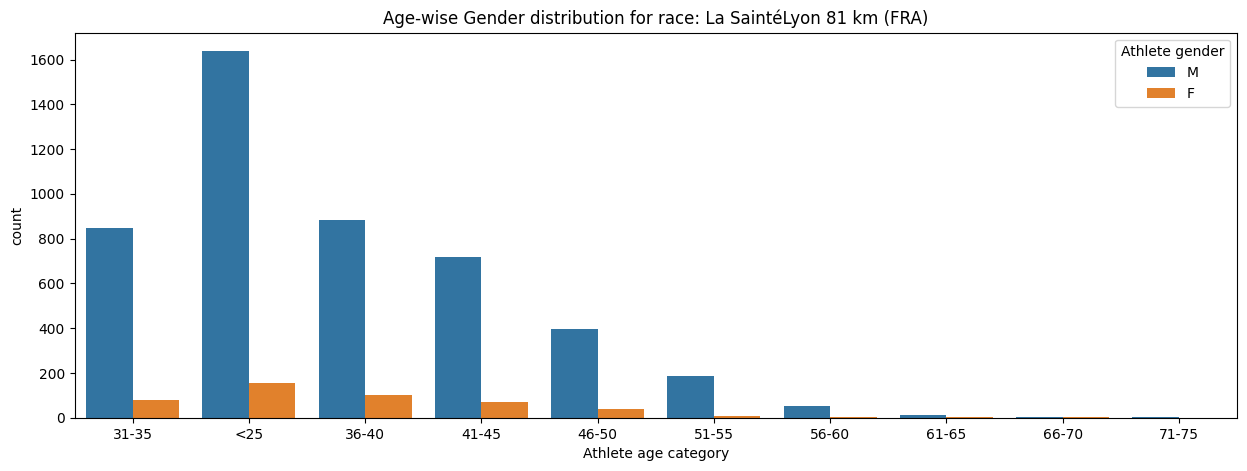

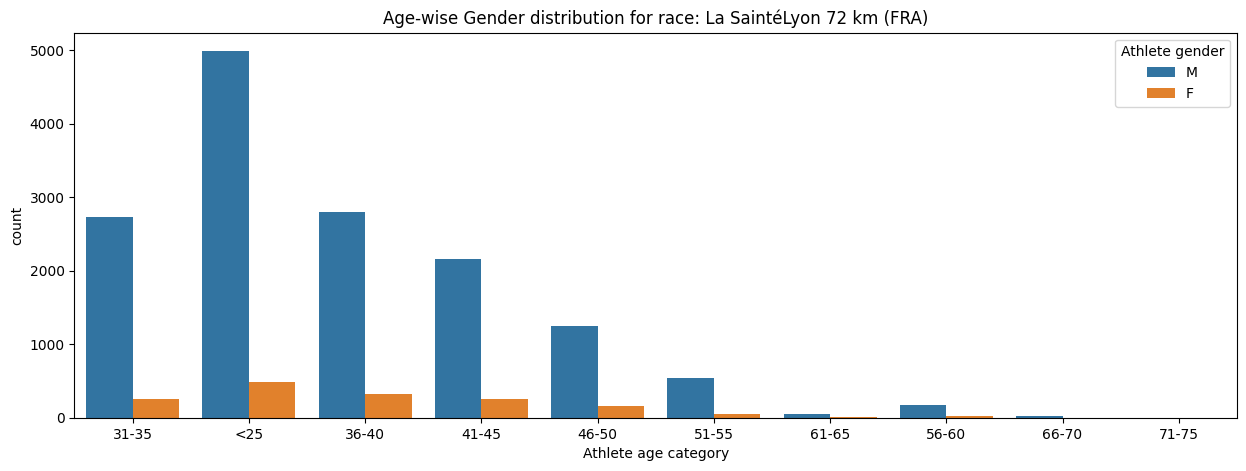

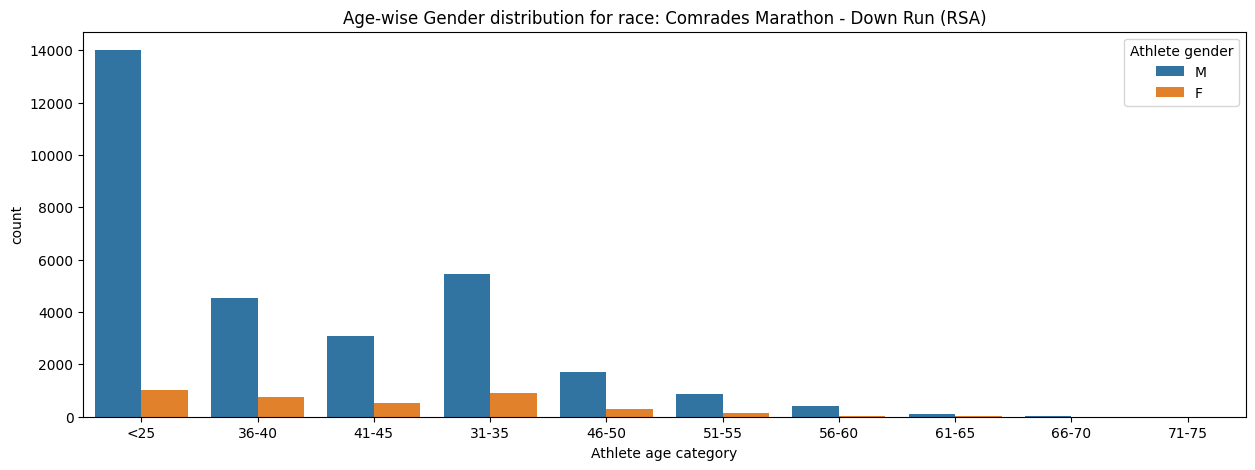

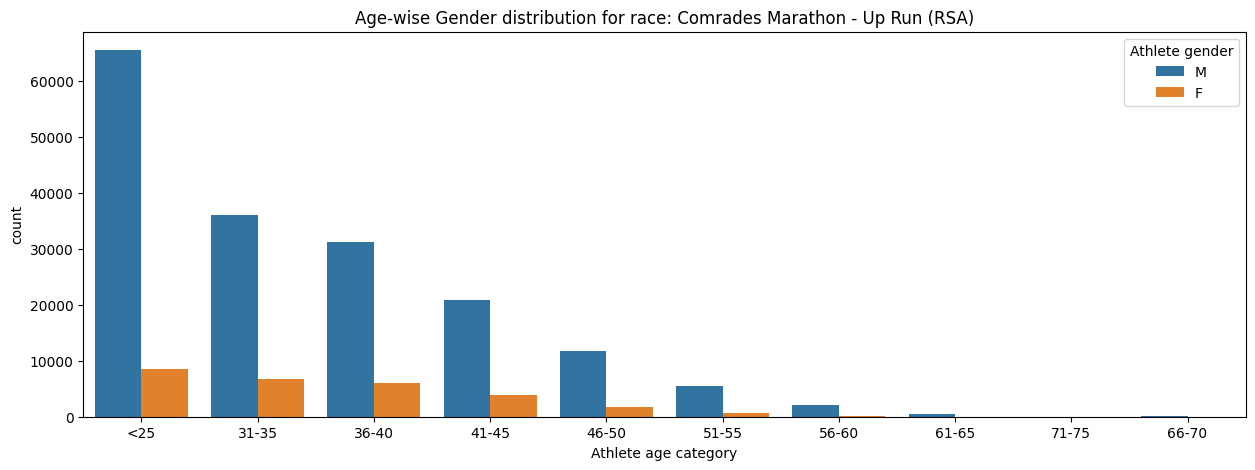

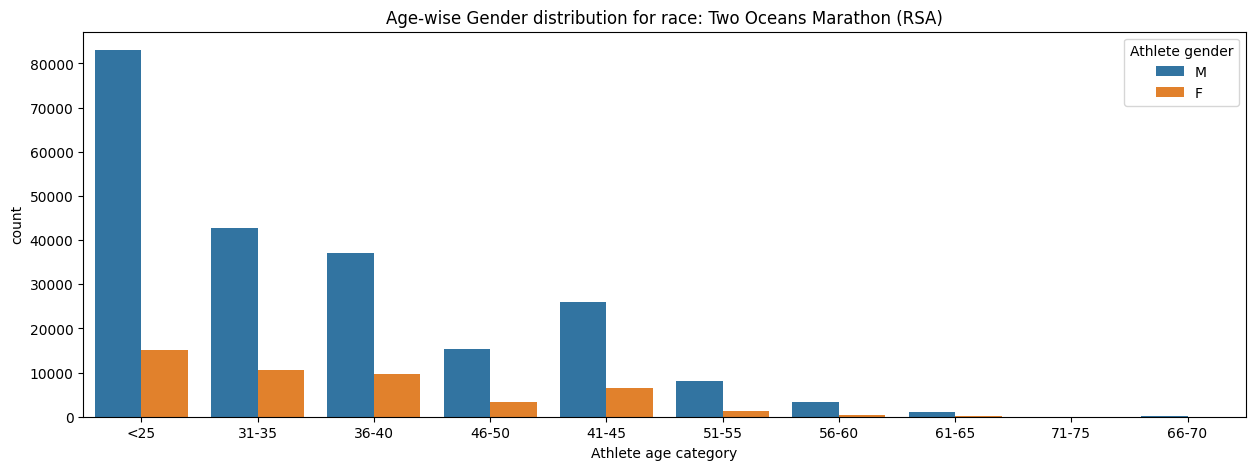

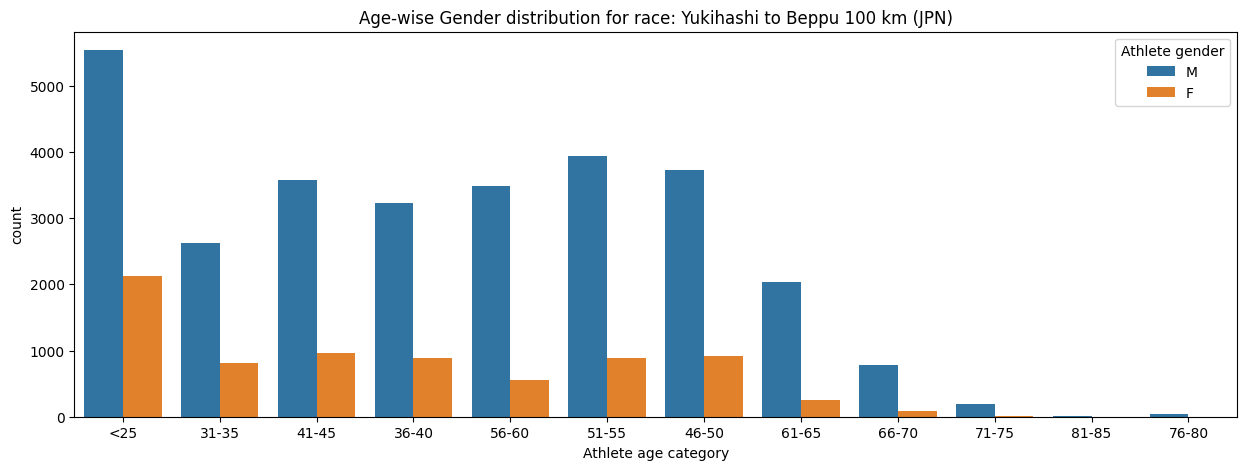

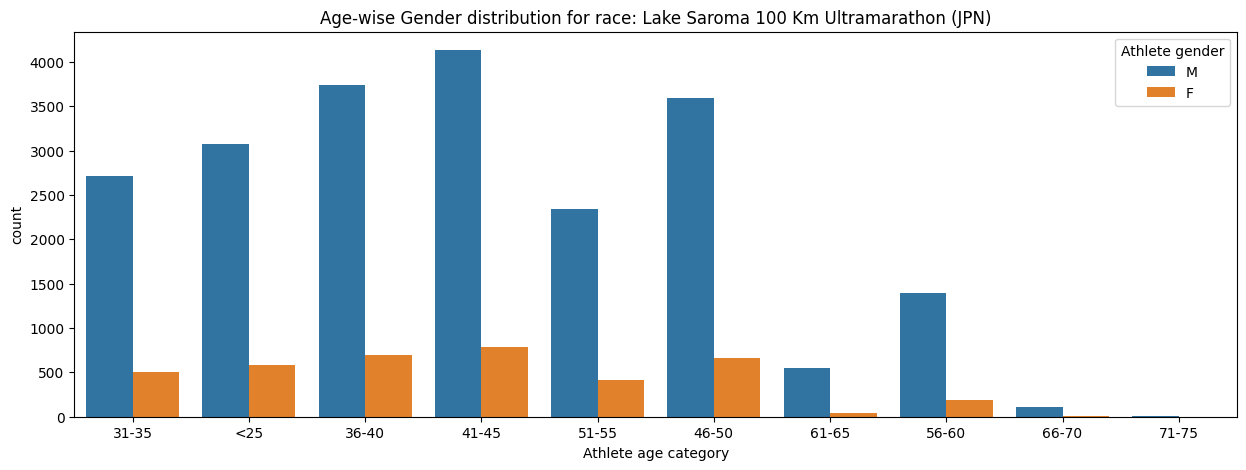

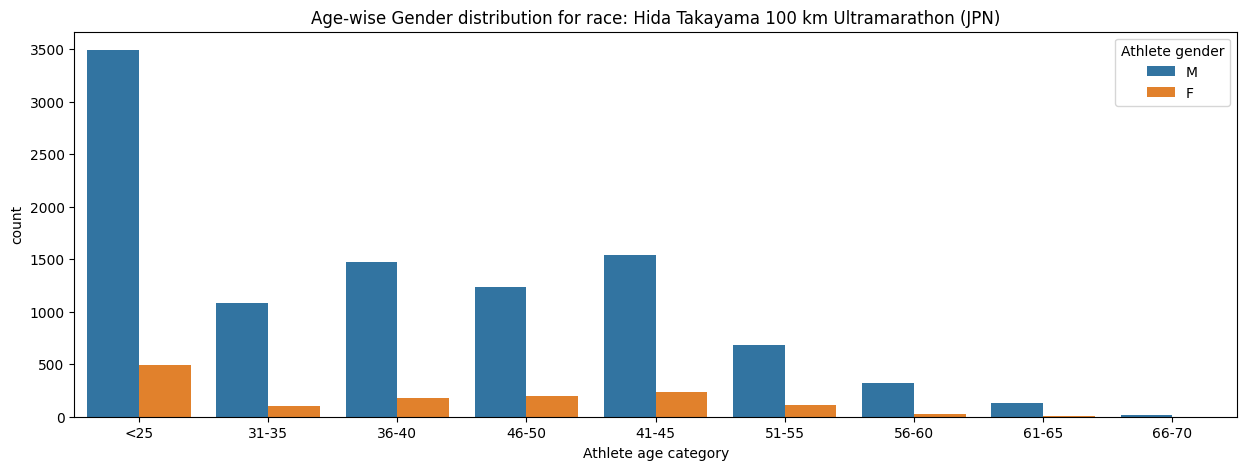

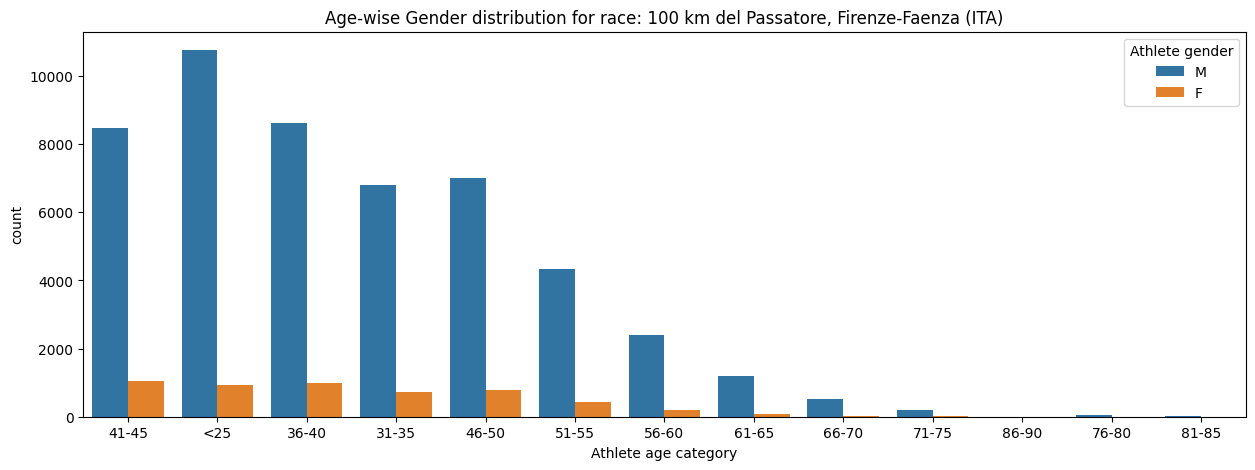

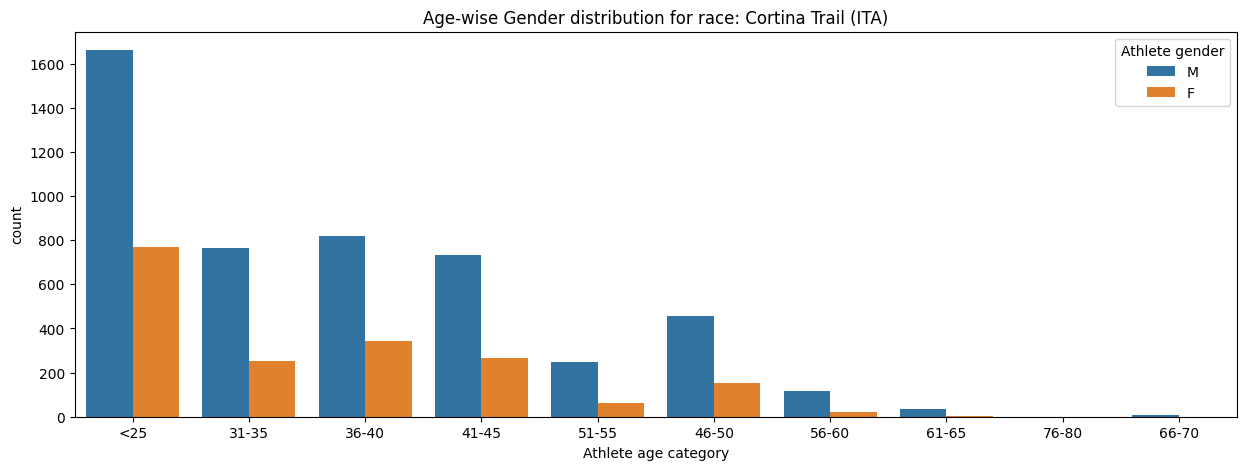

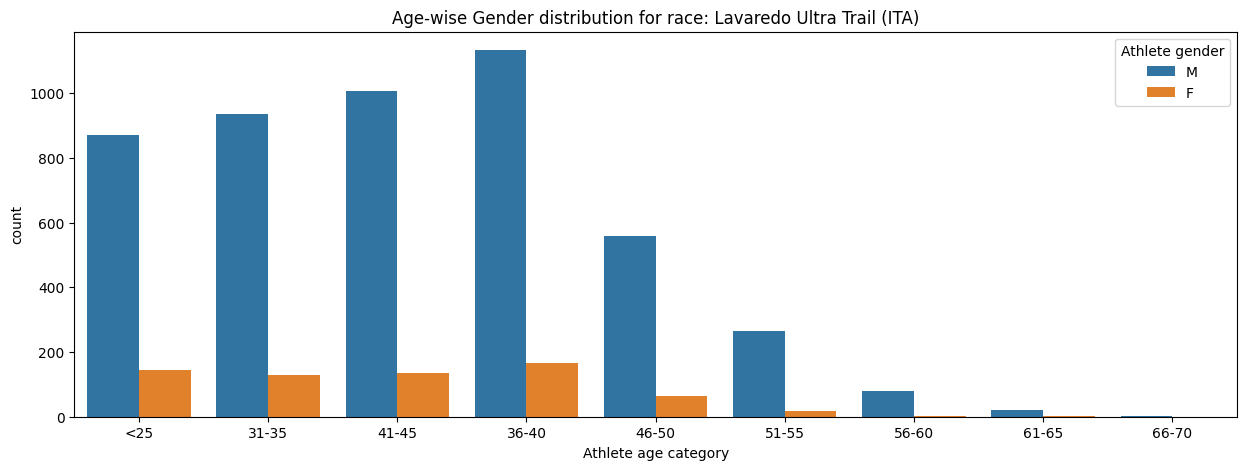

In [330]:
for race in flat_top_races:
    race_age_df = analysis_age_df[analysis_age_df['Event name'] == race]
    plt.figure(figsize=(15,5))
    sns.countplot(race_age_df,x='Athlete age category',hue='Athlete gender')
    plt.title(f'Age-wise Gender distribution for race: {race}')
    plt.show()

### Insights:
#### Race : Highest Age-wise Gender Distribution (Male/Female)
#### Marine Corps 50km Marathon Race (USA): <25 to 45 yrs (highest <25yrs)
#### JFK 50 Mile (USA): <25 to 40 yrs (highest <25yrs)
#### Way Too Cool 50K Endurance Run (USA): <25 to 50 yrs (highest 36-40yrs)
#### La SaintéLyon 78 km (FRA): <25 to 45 yrs (highest <25yrs)
#### La SaintéLyon 81 km (FRA): <25 to 45 yrs (highest <25yrs)
#### La SaintéLyon 72 km (FRA): <25 to 45 yrs (highest <25yrs)
#### Comrades Marathon - Down Run (RSA): <25 to 40 yrs (highest <25yrs)
#### Comrades Marathon - Up Run (RSA): <25 to 45 yrs (highest <25yrs)
#### Two Oceans Marathon (RSA): <25 to 45 yrs (highest <25yrs)
#### Yukihashi to Beppu 100 km (JPN): <25 to 60 yrs (highest <25yrs)
#### Lake Saroma 100 Km Ultramarathon (JPN): <25 to 55 yrs (highest 40-45yrs)
#### Hida Takayama 100 km Ultramarathon (JPN): <25 to 45 yrs (highest <25yrs)
#### 100 km del Passatore, Firenze-Faenza (ITA): <25 to 55 yrs (highest <25yrs)
#### Cortina Trail (ITA): <25 to 50 yrs (highest <25yrs)
#### Lavaredo Ultra Trail (ITA): <25 to 50 yrs (highest 36-40yrs)